![cover](./images/spotify_cover.jpg)

[Image](https://www.edmsauce.com/wp-content/uploads/2017/01/6360041936368655181636978495_shutterstock_200035424.jpg)

# What's Spoppin'?
Author: Erin Vu


## Overview

This project is an analysis and prediction of [popularity of Spotify tracks from the Kaggle datset](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks) in order to provide music production companies with a good idea of the attributes of popular songs. As a result of iterating through linear regression and random forest regression models, the most impactful feature through random forest regression was instrumentalness, duration, and acousticness, and can recommend to have produce songs with a mix of vocals and instruments.

## Business problem

The business problem for our music production companies and producers, our stakeholders, is making popular songs and figuring out what attributes make a popular song. Music production companies and producers need to know generally what people like to listen to, and with this project we can find those optimal features. We will be using linear regression and random forest regression to predict popularity of songs based on the feature data. With this information, production companies will be able to produce new popular songs to build artists' profile, and fame.

## Data Understanding

The Spotfy dataset from Kaggle has almost 600,000 songs from the years 1922-2021, and has 20 columns. The target variable is Popularity and the other features wil be used to predict the target variable. The variables are listed below as they were in the dataset description set on Kaggle and the main predictor variables for this will be the numerical features such as acousticness, danceability, energy, etc. These variables are relevant because the combinations are unique to each song and makes up a population score. A limitation for predicting popularity with this datset is predicting popularity for different age groups and user tastes as the dataset has a wide range of songs and people like different sounds and enjoy different sounds in different time periods.

Primary:

- id (Id of track generated by Spotify)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0)
- speechiness (Ranges from 0 to 1)

Dummy:

- mode (0 = Minor, 1 = Major)
- explicit (0 = No explicit content, 1 = Explicit content)


Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)
- timesignature (The predicted timesignature, most typically 4)
- artists (List of artists mentioned)
- artists (Ids of mentioned artists)
- release_date (Date of release mostly in yyyy-mm-dd format, however precision of date may vary)
- name (Name of the song)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action="ignore")
import pickle

In [2]:
tracks = pd.read_csv('./data/tracks.csv')
tracks

id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586667  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586668  0NuWgxEp51CutD2pJoF4OM                                blind   
586669  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586670  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586671  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903         0                          ['Uli']   
1                0        98200         0              ['Fernando Pessoa']   
2                0       181640         0              ['Ignacio Corsini']   
3                0       176907         0              ['Ignacio Corsini']   
4                0       163080         0                  ['Dick Haymes']   
...            ...          ...       ...                              ...   
586667          50       258267         0                      ['阿YueYue']   
586668          72       153293         0                   ['ROLE MODEL']   
586669          70       187601         0                      ['FINNEAS']   
586670          58       142003         0  ['Gentle Bones', 'Clara Benin']   
586671          38       214360         0                    ['Afrosound']   

                                               id_artists release_date  \
0                              ['45tIt06XoI0Iio4LBEVpls']   1922-02-22   
1                              ['14jtPCOoNZwquk5wd9DxrY']   1922-06-01   
2                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
3                              ['5LiOoJbxVSAMkBS2fUm3X2']   1922-03-21   
4                              ['3BiJGZsyX9sJchTqcSA7Su']         1922   
...                                                   ...          ...   
586667                         ['1QLBXKM5GCpyQQSVMNZqrZ']   2020-09-26   
586668                         ['1dy5WNgIKQU6ezkpZs4y8z']   2020-10-21   
586669                         ['37M5pPGs6V1fchFJSgCguX']   2020-09-02   
586670  ['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...   2021-03-05   
586671                         ['0i4Qda0k4nf7jnNHmSNpYv']   2015-07-01   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.645  0.4450    0   -13.338     1       0.4510         0.674   
1              0.695  0.2630    0   -22.136     1       0.9570         0.797   
2              0.434  0.1770    1   -21.180     1       0.0512         0.994   
3              0.321  0.0946    7   -27.961     1       0.0504         0.995   
4              0.402  0.1580    3   -16.900     0       0.0390         0.989   
...              ...     ...  ...       ...   ...          ...           ...   
586667         0.560  0.5180    0    -7.471     0       0.0292         0.785   
586668         0.765  0.6630    0    -5.223     1       0.0652         0.141   
586669         0.535  0.3140    7   -12.823     0       0.0408         0.895   
586670         0.696  0.6150   10    -6.212     1       0.0345         0.206   
586671         0.686  0.7230    6    -7.067     1       0.0363         0.105   

        instrumentalness  liveness  valence    tempo  time_signature  
0               0.744000    0.1510   0.1270  104.851               3  
1               0.000000    0.1480   0.6550  102.009               1  
2               0.021800    0.2120   0.4570  130.418               5  
3               0.918000    0.1040   0.3970  169.980               3  
4               0.130000    0.311

In [3]:
# Dropping columns without predictor value
tracks.drop(['id', 'name', 'id_artists'], axis=1, inplace=True)

In [4]:
# Converting release date to year
tracks['release_date'] = pd.to_datetime(tracks['release_date'])
tracks['release_date'] = tracks['release_date'].dt.year

In [5]:
# Checking for any duplicates
tracks.duplicated().sum()

2009

In [6]:
# Dropping duplicates
tracks = tracks.drop_duplicates()

In [7]:
#Checking for any missing values
tracks.isna().sum()

popularity          0
duration_ms         0
explicit            0
artists             0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [8]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584663 entries, 0 to 586671
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   popularity        584663 non-null  int64  
 1   duration_ms       584663 non-null  int64  
 2   explicit          584663 non-null  int64  
 3   artists           584663 non-null  object 
 4   release_date      584663 non-null  int64  
 5   danceability      584663 non-null  float64
 6   energy            584663 non-null  float64
 7   key               584663 non-null  int64  
 8   loudness          584663 non-null  float64
 9   mode              584663 non-null  int64  
 10  speechiness       584663 non-null  float64
 11  acousticness      584663 non-null  float64
 12  instrumentalness  584663 non-null  float64
 13  liveness          584663 non-null  float64
 14  valence           584663 non-null  float64
 15  tempo             584663 non-null  float64
 16  time_signature    58

#### Target: Popularity Analysis

In [9]:
tracks['popularity'].describe()

count    584663.000000
mean         27.643066
std          18.338463
min           0.000000
25%          13.000000
50%          27.000000
75%          41.000000
max         100.000000
Name: popularity, dtype: float64

In [10]:
IQR = 41-13
upper_bound = (1.5*IQR) + 41
lower_bound = 13 - (1.5*IQR)
print(upper_bound)
print(lower_bound)

83.0
-29.0


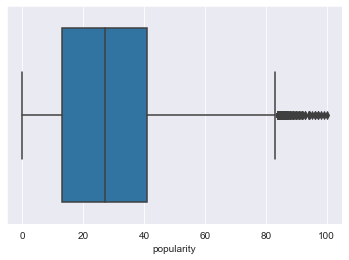

In [11]:
sns.boxplot(tracks['popularity']);

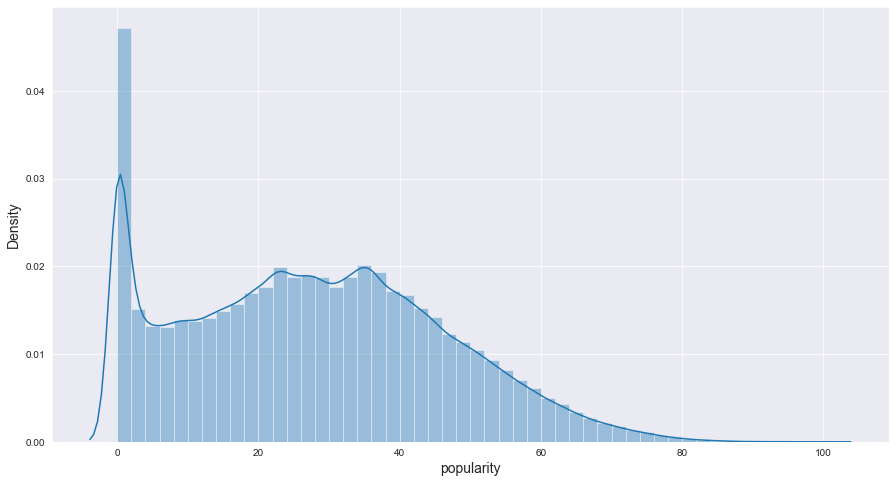

In [12]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(tracks['popularity'], ax=ax)
ax.set_xlabel(tracks['popularity'].name, fontsize=14)
ax.set_ylabel('Density', fontsize=14)
plt.savefig('./images/pop_dist', bbox_inches='tight');

In [13]:
# Below we can see there are 43k songs with no popularity rating.
zero_pop_df = tracks[tracks['popularity'] < 1]

In [14]:
zero_pop_df

popularity  duration_ms  explicit               artists  release_date  \
1                0        98200         0   ['Fernando Pessoa']          1922   
2                0       181640         0   ['Ignacio Corsini']          1922   
3                0       176907         0   ['Ignacio Corsini']          1922   
4                0       163080         0       ['Dick Haymes']          1922   
5                0       178933         0       ['Dick Haymes']          1922   
...            ...          ...       ...                   ...           ...   
586586           0       222787         0            ['ArtLec']          2017   
586591           0       226875         0         ['Shockwave']          2016   
586595           0       250306         0     ['Khushboo Jain']          2016   
586596           0       258601         0  ['DJ ReMix Workout']          2018   
586601           0       270000         0  ['The Gym Allstars']          2017   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
1              0.695  0.2630    0   -22.136     1       0.9570      0.797000   
2              0.434  0.1770    1   -21.180     1       0.0512      0.994000   
3              0.321  0.0946    7   -27.961     1       0.0504      0.995000   
4              0.402  0.1580    3   -16.900     0       0.0390      0.989000   
5              0.227  0.2610    5   -12.343     1       0.0382      0.994000   
...              ...     ...  ...       ...   ...          ...           ...   
586586         0.712  0.8820    9    -7.197     0       0.0416      0.003220   
586591         0.695  0.6350    7    -5.223     1       0.0835      0.031400   
586595         0.764  0.9020    1    -3.430     1       0.1100      0.313000   
586596         0.652  0.7860   10    -5.783     1       0.0438      0.009930   
586601         0.704  0.8690    2    -4.913     1       0.0551      0.000484   

        instrumentalness  liveness  valence    tempo  time_signature  
1               0.000000    0.1480   0.6550  102.009               1  
2               0.021800    0.2120   0.4570  130.418               5  
3               0.918000    0.1040   0.3970  169.980               3  
4               0.130000    0.3110   0.1960  103.220               4  
5               0.247000    0.0977   0.0539  118.891               4  
...                  ...       ...      ...      ...             ...  
586586          0.900000    0.3430   0.3120  123.977               4  
586591          0.020700    0.1030   0.2360  128.020               4  
586595          0.000007    0.1510   0.8760   87.006               4  
586596          0.000722    0.0433   0.9460  141.990               4  
586601          0.808000    0.0820   0.6750  127.996               4  

[43285 rows x 17 columns]

Wall time: 20.2 s


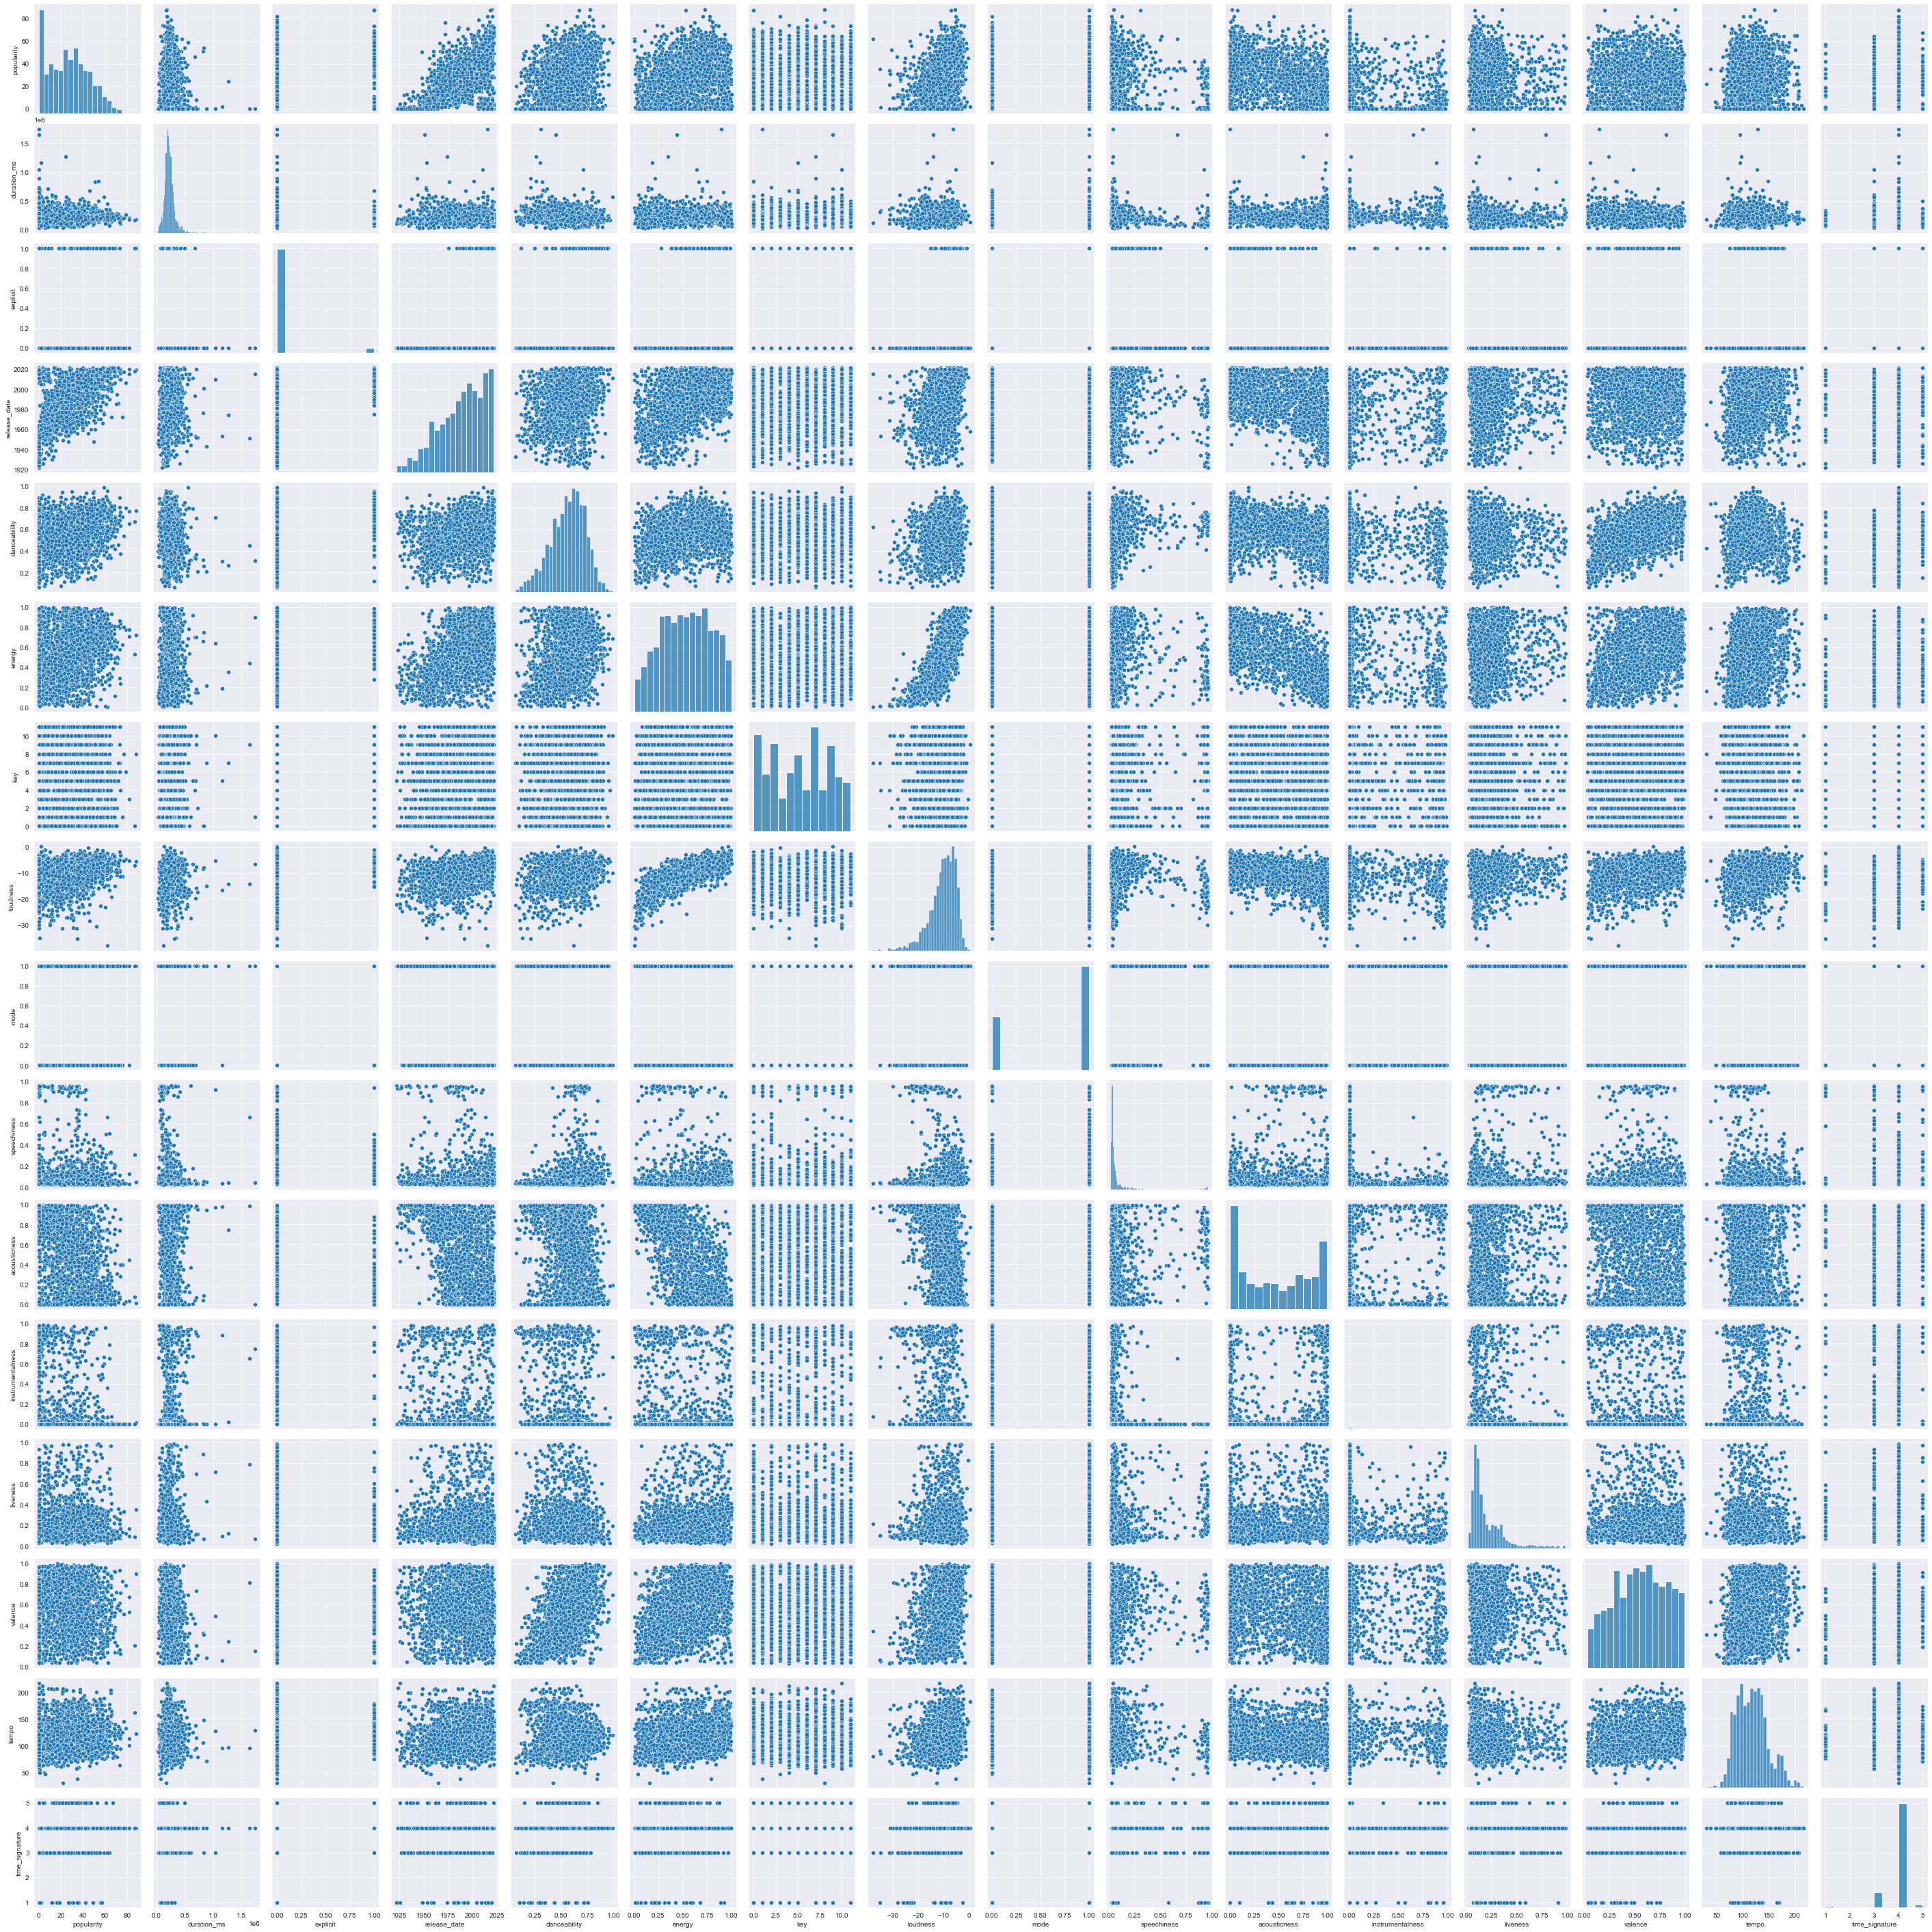

In [15]:
%%time
sns.pairplot(tracks.sample(2000));

In [16]:
pop_corr = abs(tracks.corr()[['popularity']]).sort_values('popularity', ascending=False)
pop_corr

popularity
popularity          1.000000
release_date        0.594047
acousticness        0.372003
loudness            0.328481
energy              0.302996
instrumentalness    0.234479
explicit            0.212535
danceability        0.188019
time_signature      0.086895
tempo               0.070704
liveness            0.049658
speechiness         0.048057
mode                0.034274
duration_ms         0.028155
key                 0.015541
valence             0.003715

In [17]:
pop_corr.index

Index(['popularity', 'release_date', 'acousticness', 'loudness', 'energy',
       'instrumentalness', 'explicit', 'danceability', 'time_signature',
       'tempo', 'liveness', 'speechiness', 'mode', 'duration_ms', 'key',
       'valence'],
      dtype='object')

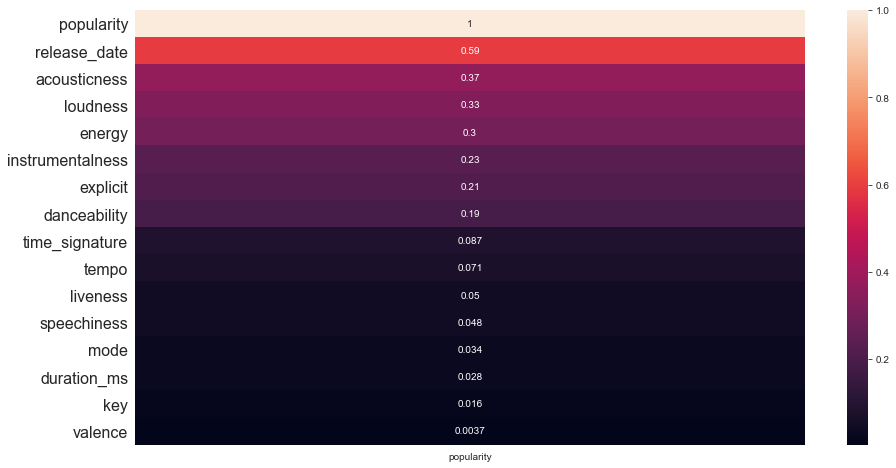

In [18]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(pop_corr, ax=ax, annot=True)
ax.set_yticklabels(labels=pop_corr.index, fontsize=16)
plt.savefig('./images/heatmap');

In [19]:
corr = abs(tracks.corr())
corr

popularity  duration_ms  explicit  release_date  \
popularity          1.000000     0.028155  0.212535      0.594047   
duration_ms         0.028155     1.000000  0.016704      0.054240   
explicit            0.212535     0.016704  1.000000      0.208672   
release_date        0.594047     0.054240  0.208672      1.000000   
danceability        0.188019     0.120677  0.150154      0.224035   
energy              0.302996     0.024675  0.123059      0.457994   
key                 0.015541     0.004450  0.011253      0.023735   
loudness            0.328481     0.000144  0.134764      0.445148   
mode                0.034274     0.027686  0.051561      0.080891   
speechiness         0.048057     0.126073  0.102188      0.082645   
acousticness        0.372003     0.064318  0.148970      0.525542   
instrumentalness    0.234479     0.068563  0.067146      0.219534   
liveness            0.049658     0.002298  0.012922      0.020711   
valence             0.003715     0.162754  0.016675      0.026629   
tempo               0.070704     0.001220  0.005529      0.119439   
time_signature      0.086895     0.037334  0.044443      0.115458   

                  danceability    energy       key  loudness      mode  \
popularity            0.188019  0.302996  0.015541  0.328481  0.034274   
duration_ms           0.120677  0.024675  0.004450  0.000144  0.027686   
explicit              0.150154  0.123059  0.011253  0.134764  0.051561   
release_date          0.224035  0.457994  0.023735  0.445148  0.080891   
danceability          1.000000  0.239871  0.018779  0.249385  0.044294   
energy                0.239871  1.000000  0.036317  0.764628  0.065009   
key                   0.018779  0.036317  1.000000  0.026880  0.129845   
loudness              0.249385  0.764628  0.026880  1.000000  0.040303   
mode                  0.044294  0.065009  0.129845  0.040303  1.000000   
speechiness           0.199376  0.053866  0.001058  0.168166  0.018056   
acousticness          0.241448  0.714777  0.027504  0.519031  0.058487   
instrumentalness      0.225427  0.194523  0.006878  0.328639  0.010182   
liveness              0.106161  0.124991  0.006681  0.029517  0.006677   
valence               0.527925  0.372110  0.019941  0.274734  0.011393   
tempo                 0.041931  0.229678  0.004973  0.188504  0.007759   
time_signature        0.145421  0.188597  0.008828  0.162991  0.015992   

                  speechiness  acousticness  instrumentalness  liveness  \
popularity           0.048057      0.372003          0.234479  0.049658   
duration_ms          0.126073      0.064318          0.068563  0.002298   
explicit             0.102188      0.148970          0.067146  0.012922   
release_date         0.082645      0.525542          0.219534  0.020711   
danceability         0.199376      0.241448          0.225427  0.106161   
energy               0.053866      0.714777          0.194523  0.124991   
key                  0.001058      0.027504          0.006878  0.006681   
loudness             0.168166      0.519031          0.328639  0.029517   
mode                 0.018056      0.058487          0.010182  0.006677   
speechiness          1.000000      0.069373          0.102242  0.207364   
acousticness         0.069373      1.000000          0.203105  0.005077   
instrumentalness     0.102242      0.203105          1.000000  0.038613   
liveness             0.207364      0.005077          0.038613  1.000000   
valence              0.046160      0.180624          0.174155  0.000213   
tempo                0.087510      0.194764          0.054610  0.015073   
time_signature       0.114575      0.173912          0.041999  0.024155   

                   valence     tempo  time_signature  
popularity        0.003715  0.070704        0.086895  
duration_ms       0.162754  0.001220        0.037334  
explicit          0.016675  0.005529        0.044443  
release_date      0.026629  0.119439        0.115458  
danceability      0.527925  0.0419

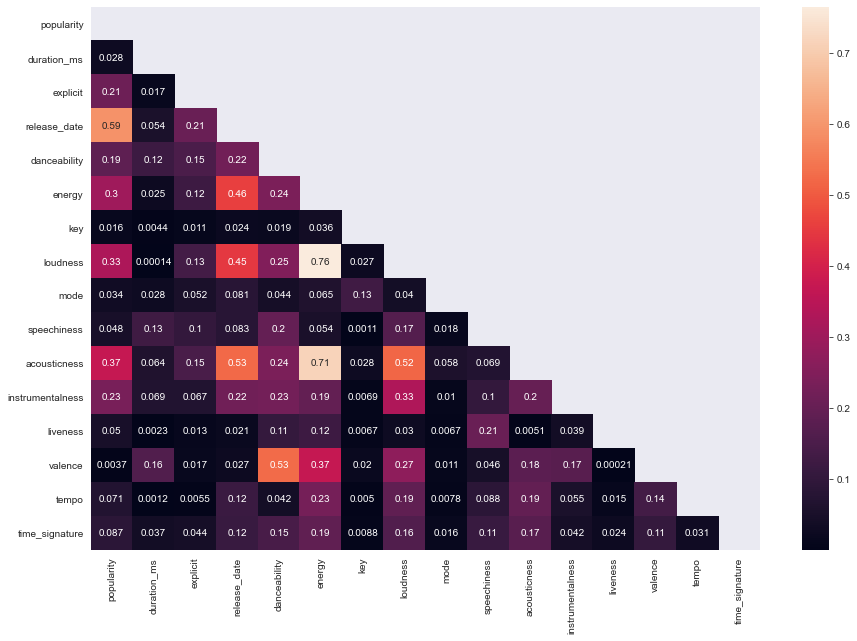

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, ax=ax, annot=True, mask=np.triu(np.ones_like(corr, dtype=bool)));

### Feature Exploration

In [21]:
def feature_corr(feature):
    feature_corr = tracks['popularity'].corr(tracks[feature])
    return print(f'{feature.title()} correlation with popularity is {feature_corr}')

#### Artists

In [22]:
unique_artists = tracks['artists'].nunique()

In [23]:
print(f'Unique artists: {unique_artists}')

Unique artists: 114030


In [24]:
artist_pop = tracks.groupby('artists')['popularity'].sum().sort_values(ascending=False)
top_25 = artist_pop[:25]

In [25]:
top_25

artists
['Die drei ???']                              140705
['TKKG Retro-Archiv']                          58554
['Bibi Blocksberg']                            49785
['Benjamin Blümchen']                          42288
['Bibi und Tina']                              31641
['Queen']                                      29352
['Fünf Freunde']                               22190
['Elvis Presley']                              21779
['Pink Floyd']                                 21489
['Taylor Swift']                               21467
['The Rolling Stones']                         20985
['The Beatles']                                20129
['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']     19653
['Fleetwood Mac']                              18128
['Frank Sinatra']                              17152
['Julio Iglesias']                             16896
['Metallica']                                  16637
['Luis Miguel']                                15802
['BTS']                               

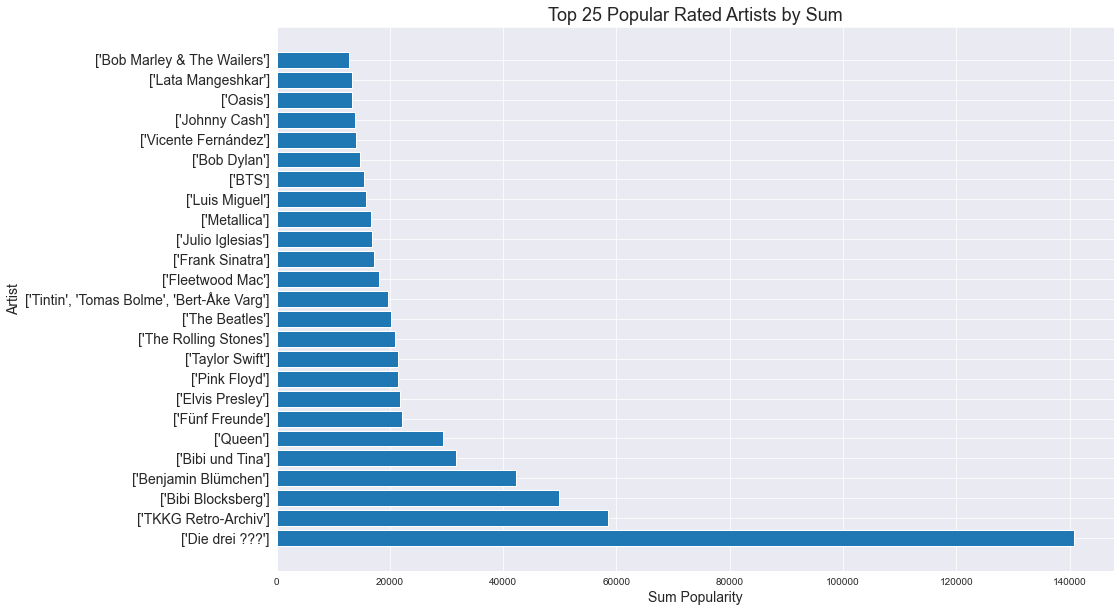

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(top_25.index, top_25.values)
ax.set_title('Top 25 Popular Rated Artists by Sum', fontsize=18)
ax.set_xlabel('Sum Popularity', fontsize=14)
ax.set_ylabel('Artist', fontsize=14)
ax.set_yticklabels(top_25.index, fontsize=14);

In [27]:
tracks['pop_artists_100songs'] = tracks['artists'].map(tracks['artists'].value_counts() > 100)

In [28]:
tracks.shape

(584663, 18)

In [29]:
pop_artists = tracks[tracks['pop_artists_100songs']== True]

In [30]:
pop_artists['pop_artists_100songs'].value_counts()

True    114304
Name: pop_artists_100songs, dtype: int64

In [31]:
pop_artists

popularity  duration_ms  explicit               artists  release_date  \
2                0       181640         0   ['Ignacio Corsini']          1922   
3                0       176907         0   ['Ignacio Corsini']          1922   
9                0       181173         0   ['Ignacio Corsini']          1922   
19               0       153533         0   ['Ignacio Corsini']          1922   
22               0       181440         0   ['Ignacio Corsini']          1922   
...            ...          ...       ...                   ...           ...   
586521          35       289480         0          ['Jay Chou']          2014   
586580          49       307520         0  ['Hillsong Worship']          2016   
586608           1        40680         0  ['Armin van Buuren']          2018   
586619           1        41739         0  ['Armin van Buuren']          2020   
586621          47       266383         0          ['Jay Chou']          2019   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
2              0.434  0.1770    1   -21.180     1       0.0512      0.994000   
3              0.321  0.0946    7   -27.961     1       0.0504      0.995000   
9              0.548  0.0391    6   -23.228     1       0.1530      0.996000   
19             0.370  0.3720    2   -17.138     1       0.0865      0.985000   
22             0.339  0.0958    8   -26.944     1       0.0530      0.994000   
...              ...     ...  ...       ...   ...          ...           ...   
586521         0.523  0.5720    1    -6.834     1       0.0274      0.356000   
586580         0.408  0.5190    9    -8.732     1       0.0311      0.106000   
586608         0.572  0.6660   11   -10.493     0       0.3080      0.137000   
586619         0.597  0.9530    1    -7.136     1       0.1240      0.000151   
586621         0.507  0.5010    0    -9.475     1       0.0287      0.282000   

        instrumentalness  liveness  valence    tempo  time_signature  \
2               0.021800    0.2120    0.457  130.418               5   
3               0.918000    0.1040    0.397  169.980               3   
9               0.933000    0.1480    0.612   75.595               3   
19              0.000681    0.9290    0.753  159.669               4   
22              0.969000    0.1230    0.219   86.279               3   
...                  ...       ...      ...      ...             ...   
586521          0.000001    0.1210    0.306  106.943               4   
586580          0.000000    0.9600    0.212  141.883               4   
586608          0.000000    0.5640    0.957  129.118               3   
586619          0.249000    0.6840    0.184  138.006               4   
586621          0.000022    0.0947    0.134  137.975               4   

        pop_artists_100songs  
2                       True  
3                       True  
9                       True  
19                      True  
22                      True  
...                      ...  
586521                  True  
586580                  True  
586608                  True  
586619                  True  
586621                  True  

[114304 rows x 18 columns]

In [32]:
top_pop_artists = pop_artists.groupby('artists')['popularity'].mean().sort_values(ascending=False)
top_pop_artists

artists
['Drake']                                                 62.689320
['Taylor Swift']                                          60.813031
['Arctic Monkeys']                                        60.028037
['BTS']                                                   59.482625
['Eminem']                                                58.302817
                                                            ...    
['Franz Joseph Haydn', 'Pro Arte Quartet']                 0.000000
['Arthur Conan Doyle']                                     0.000000
['Janusz Korczak']                                         0.000000
['Юрий Тынянов']                                           0.000000
['Radclyffe Hall', 'Alice White', 'Synthesized Voice']     0.000000
Name: popularity, Length: 557, dtype: float64

In [33]:
top_25_artists = top_pop_artists[:25]
top_25_artists

artists
['Drake']                                                     62.689320
['Taylor Swift']                                              60.813031
['Arctic Monkeys']                                            60.028037
['BTS']                                                       59.482625
['Eminem']                                                    58.302817
['Lana Del Rey']                                              58.127660
['Linkin Park']                                               55.884298
['Jorge & Mateus']                                            52.468750
['Rammstein']                                                 51.451389
['Red Hot Chili Peppers']                                     50.698225
['Jack Johnson']                                              50.596491
['Green Day']                                                 50.588235
['Maná']                                                      49.633028
['Demi Lovato']                                         

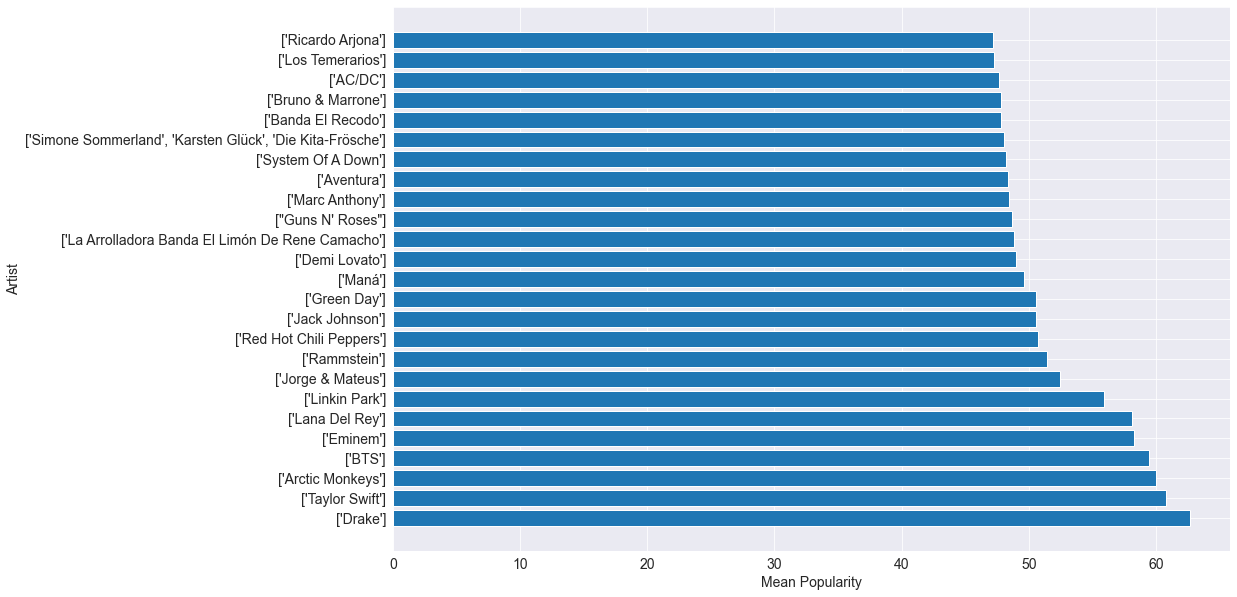

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.barh(top_25_artists.index, top_25_artists.values)
#ax.set_title('Top 25 Popular Artists by Mean with > 100 songs', fontsize=18)
ax.set_xlabel('Mean Popularity', fontsize=14)
ax.set_ylabel('Artist', fontsize=14)
ax.set_yticklabels(top_25_artists.index, fontsize=14)
ax.set_xticklabels(range(0,80,10), fontsize=14);

In [35]:
tracks['mean'] = tracks.groupby('artists')['popularity'].transform('mean')

In [36]:
tracks['count'] = tracks.groupby('artists')['popularity'].transform('count')

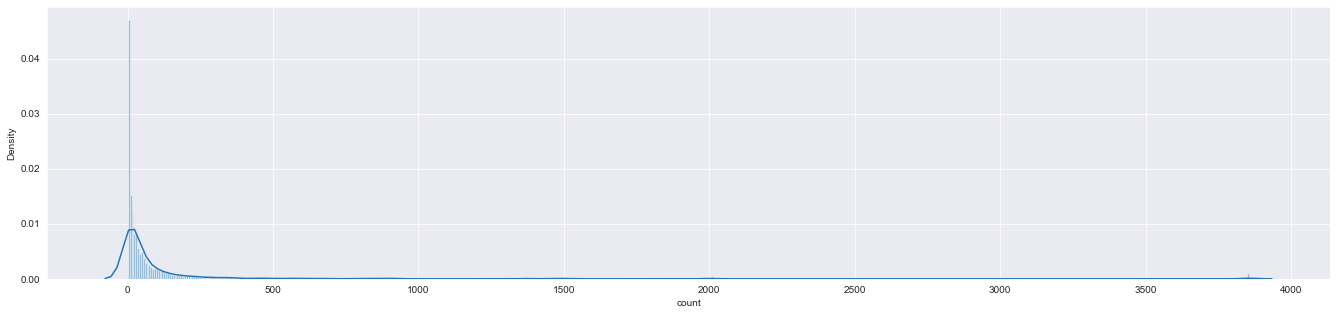

In [37]:
fig, ax = plt.subplots(figsize=(23,5))
sns.distplot(tracks['count'], bins = 600, ax=ax);

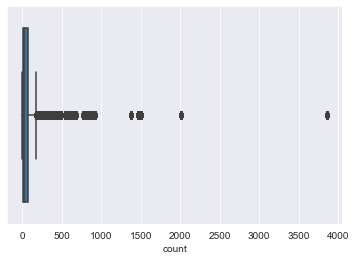

In [38]:
sns.boxplot(tracks['count']);

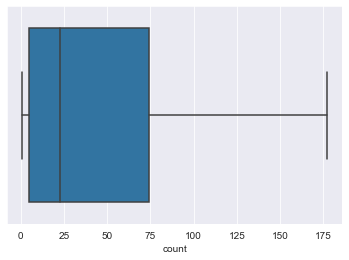

In [39]:
sns.boxplot(tracks['count'], showfliers=False);

In [40]:
multiple = tracks[['artists', 'mean']].loc[tracks['count']>700].value_counts(ascending=False).reset_index()
multiple

artists       mean     0
0                             ['Die drei ???']  36.489886  3856
1                        ['TKKG Retro-Archiv']  29.189432  2006
2                        ['Benjamin Blümchen']  28.192000  1500
3                          ['Bibi Blocksberg']  34.052668  1462
4                          ['Lata Mangeshkar']   9.754745  1370
5                            ['Bibi und Tina']  34.580328   915
6   ['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']  21.716022   905
7                         ['Francisco Canaro']   0.064553   883
8                          ['Ella Fitzgerald']  11.235632   870
9                 ['Tadeusz Dolega Mostowicz']   0.110979   838
10                            ['Fünf Freunde']  27.327586   812
11                           ['Mohammed Rafi']  12.076531   784
12                                   ['Queen']  37.922481   774

In [41]:
# Dropping artists with excessive amounts of of releases 
tracks = tracks[tracks['count'] < 700]

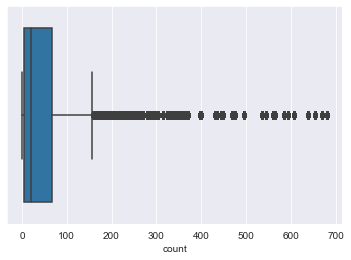

In [42]:
sns.boxplot(tracks['count']);

#### Explicit

explicit (0 = No explicit content, 1 = Explicit content)

In [43]:
feature_corr('explicit')

Explicit correlation with popularity is 0.2135674543543474


In [44]:
explicit=tracks['explicit']
y_explicit = ['no explicit', 'explicit']

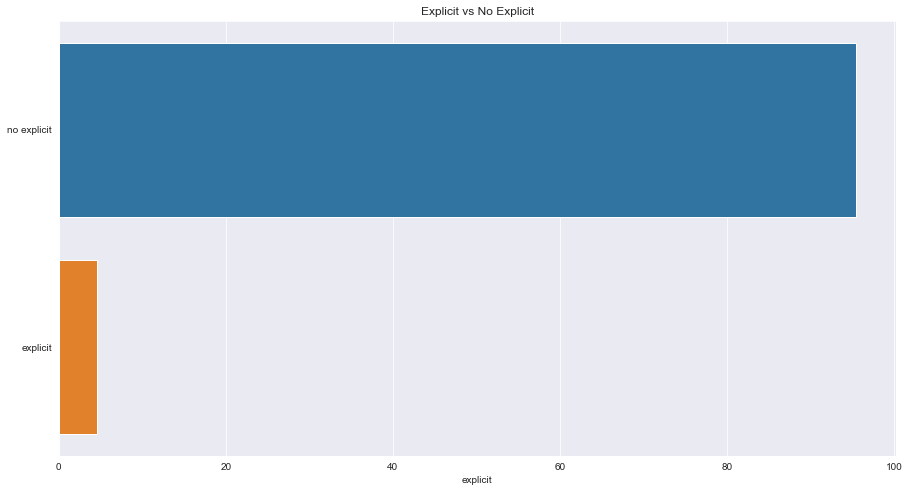

In [45]:
fig, ax = plt.subplots(figsize=(15,8))
sns.barplot(explicit.value_counts(normalize=True)*100,y=y_explicit, data=tracks, ax=ax)
ax.set_title('Explicit vs No Explicit');

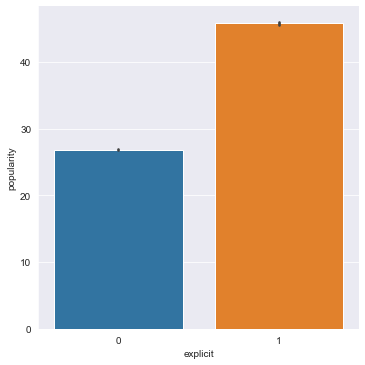

In [46]:
sns.catplot(data=tracks, kind='bar', x='explicit', y='popularity');

Above, we can see most of our songs are not explicit but the more popular songs are explicit.

#### Key

In [47]:
feature_corr('key')

Key correlation with popularity is 0.015882879142081124


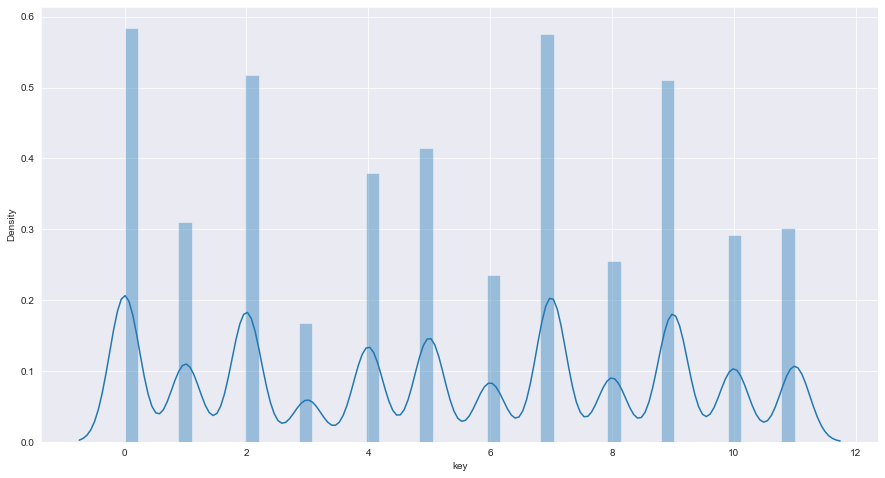

In [48]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(tracks['key'], ax=ax);

In [49]:
tracks['key'].value_counts(normalize=True)

0     0.128601
7     0.126740
2     0.113992
9     0.112368
5     0.091180
4     0.083401
1     0.068381
11    0.066498
10    0.064155
8     0.056145
6     0.051789
3     0.036749
Name: key, dtype: float64

We can see most of our songs have a key of 0, 7, 9, and 2. 

#### Mode

mode (0 = Minor, 1 = Major)


In [50]:
tracks['mode'].value_counts(normalize=True)

1    0.659047
0    0.340953
Name: mode, dtype: float64

In [51]:
tracks['mode'].value_counts().index

Int64Index([1, 0], dtype='int64')

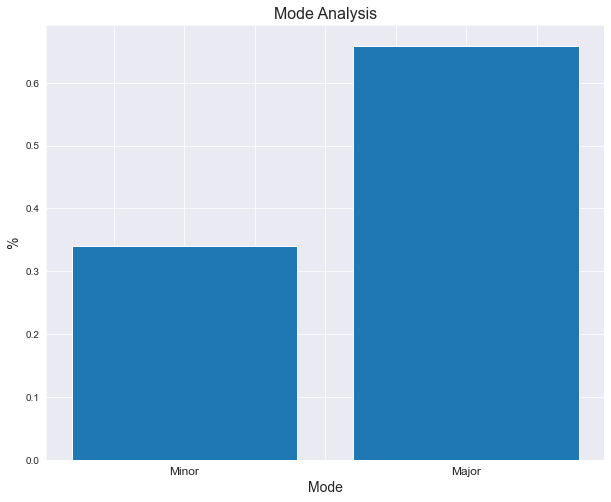

In [52]:
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(tracks['mode'].value_counts().index, tracks['mode'].value_counts(normalize=True).values)
ax.set_title('Mode Analysis', fontsize=16)
ax.set_xlabel('Mode', fontsize=14)
ax.set_ylabel('%', fontsize=14)
ax.set_xticklabels([' ', ' ', 'Minor', ' ', ' ', ' ', 'Major'], fontsize=12);

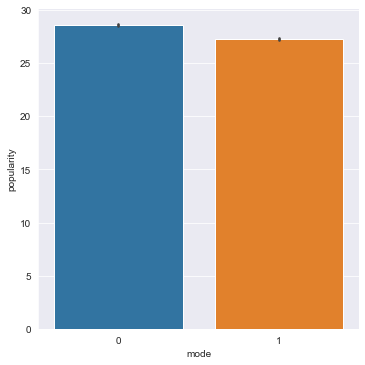

In [53]:
sns.catplot(data=tracks, kind='bar', x='mode', y='popularity');

The mode for the songs leans heavily on the major end but the popularity is level between the two.

#### Time Signature

In [54]:
feature_corr('time_signature')

Time_Signature correlation with popularity is 0.09313313073087252


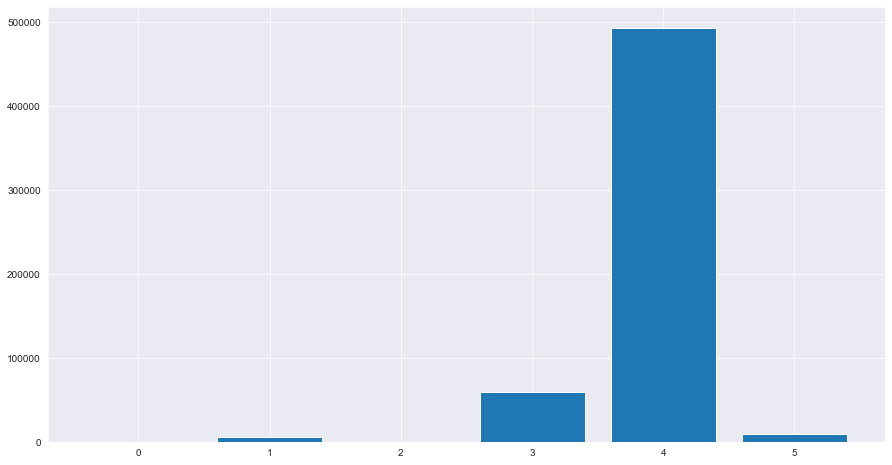

In [55]:
fig, ax = plt.subplots(figsize=(15,8))
ax.bar(tracks['time_signature'].value_counts().index, tracks['time_signature'].value_counts().values);

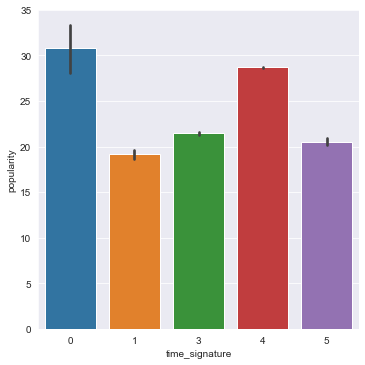

In [56]:
sns.catplot(data=tracks, kind='bar', x='time_signature', y='popularity');

The bulk of the songs have a time signature of 4 and has the most popular songs out of the other time signatures. There are less songs with a time signature of 5 but has the second most popularity among the time signatures, including time signature 3 with more songs of that signature.

### Numerical Attributes

In [57]:
def feature_analysis(feature):
    '''Creates distplot and graph of feature and mean of popularity'''
    
    feature_corr(feature)
    
    fig, ax = plt.subplots(figsize=(15,8))
    sns.distplot(tracks[feature], ax=ax)
    ax.set_title(f'{feature.title()} Distribution', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    
    print(tracks[feature].describe())
    
    feature_pop_mean = tracks.groupby(feature)['popularity'].mean()
    
    fig, ax = plt.subplots(figsize=(15,8))
    ax.scatter(feature_pop_mean.index, feature_pop_mean.values, alpha=.3)
    ax.set_title(f'{feature.title()} vs Mean Popularity', fontsize=16)
    ax.set_xlabel(f'{feature.title()}', fontsize=14)
    ax.set_ylabel('Mean Popularity', fontsize=14)
    return plt.show();

In [58]:
numeric = ['danceability',
          'energy',
          'acousticness',
          'loudness',
          'speechiness',
          'instrumentalness',
          'liveness',
          'valence',
          'tempo',
          'duration_ms']

#### Danceability

Danceability correlation with popularity is 0.19034031601679136
count    567688.000000
mean          0.561807
std           0.166670
min           0.000000
25%           0.451000
50%           0.574000
75%           0.684000
max           0.991000
Name: danceability, dtype: float64


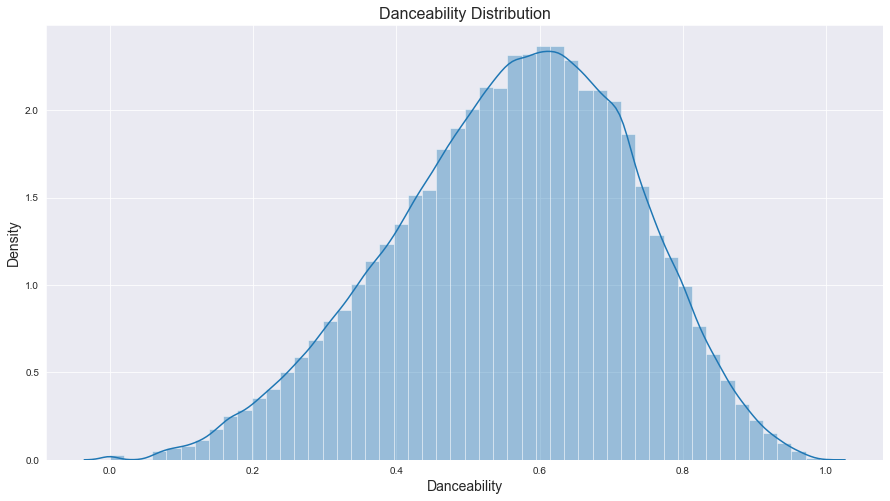

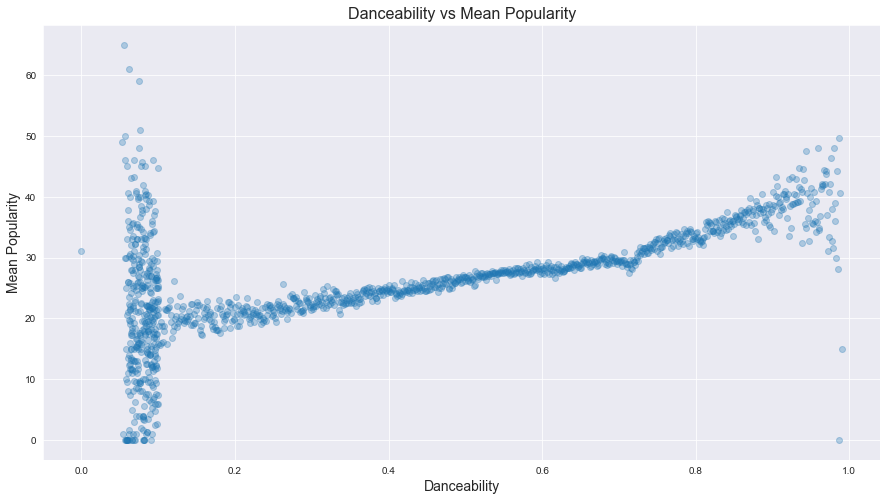

In [59]:
feature_analysis('danceability')

Above we can see a slight positive correlation between increased danceability and popularity.  

#### Energy

Energy correlation with popularity is 0.3000638274981227
count    567688.000000
mean          0.545250
std           0.252709
min           0.000000
25%           0.347000
50%           0.554000
75%           0.753000
max           1.000000
Name: energy, dtype: float64


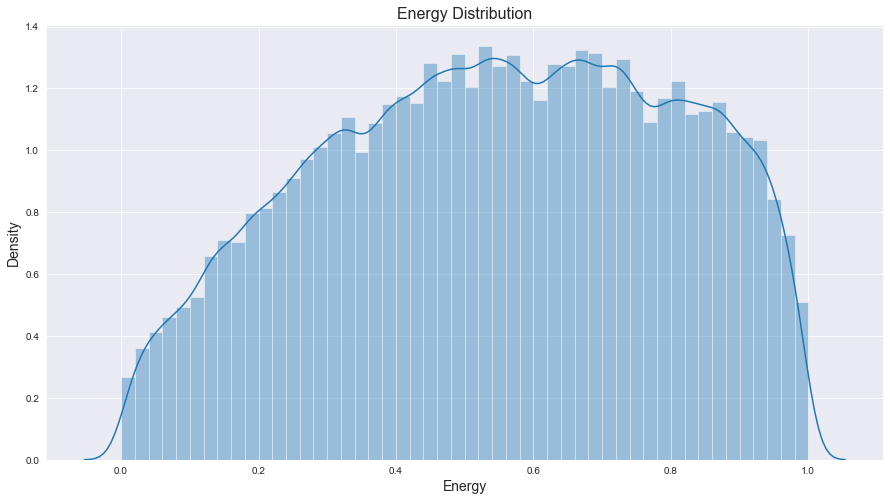

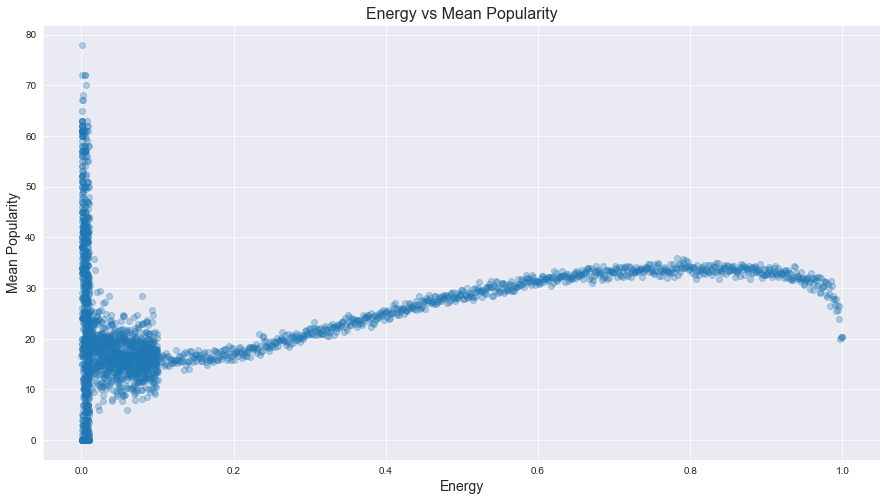

In [60]:
feature_analysis('energy')

Above, we can see the bulk of the values congregating towards low energy and staying relatively stable throughout the energy scale and dips at the end.

#### Acousticness

Acousticness correlation with popularity is -0.36943894759457974
count    567688.000000
mean          0.444801
std           0.349488
min           0.000000
25%           0.091600
50%           0.410000
75%           0.782000
max           0.996000
Name: acousticness, dtype: float64


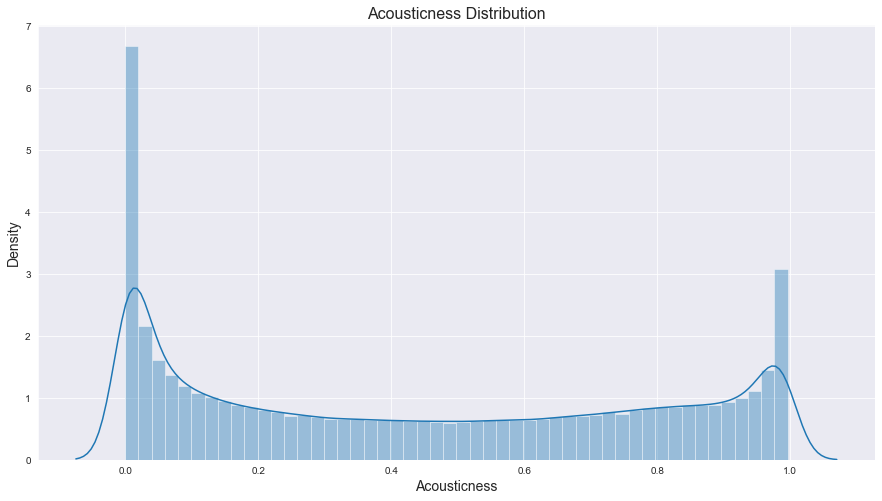

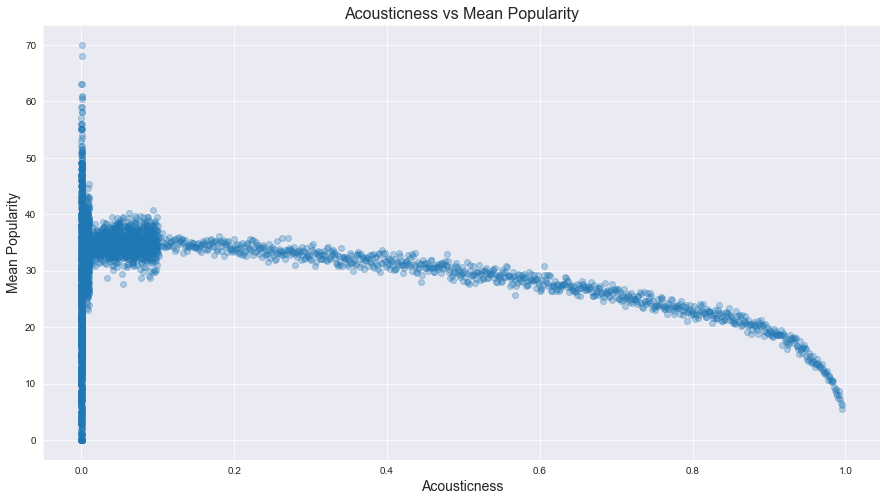

In [61]:
feature_analysis('acousticness')

The acousticness has varying levels of popularity on the not acoustic end but leveled as it goes through to full acoustic.m

#### Loudness

Loudness correlation with popularity is 0.3303361753618864
count    567688.000000
mean        -10.113868
std           5.066950
min         -60.000000
25%         -12.771000
50%          -9.130000
75%          -6.419000
max           5.376000
Name: loudness, dtype: float64


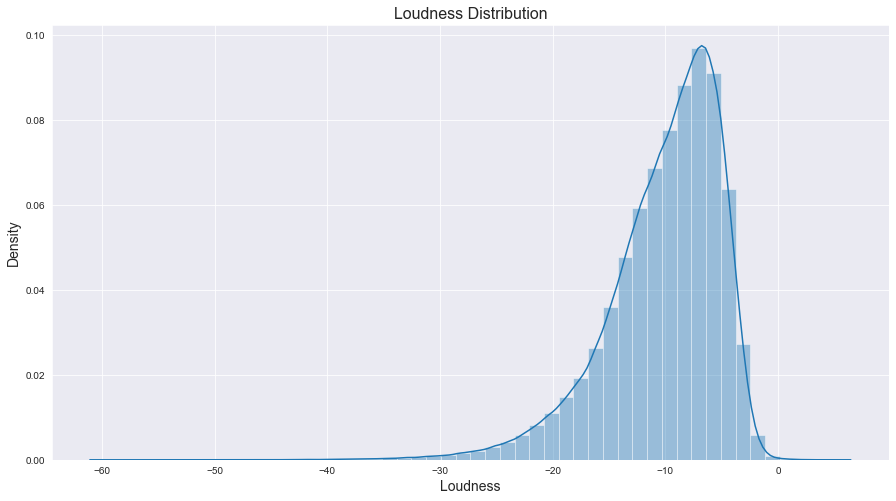

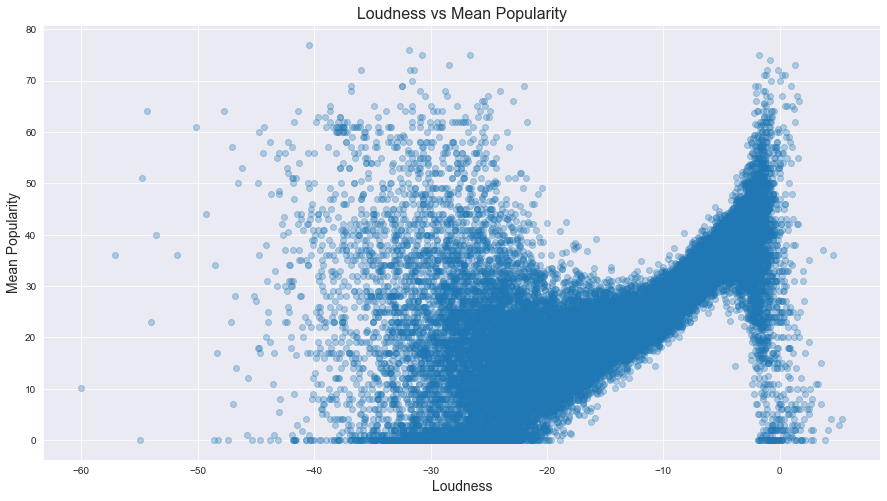

In [62]:
feature_analysis('loudness')

The loudness range is mostly concentrated between -20 and 0. Tracks with loudness between -10 and 0 and do not have songs with high popularity. 

#### Speechiness

Speechiness correlation with popularity is -0.07172874785022577
count    567688.000000
mean          0.089088
std           0.143008
min           0.000000
25%           0.033800
50%           0.043600
75%           0.072000
max           0.971000
Name: speechiness, dtype: float64


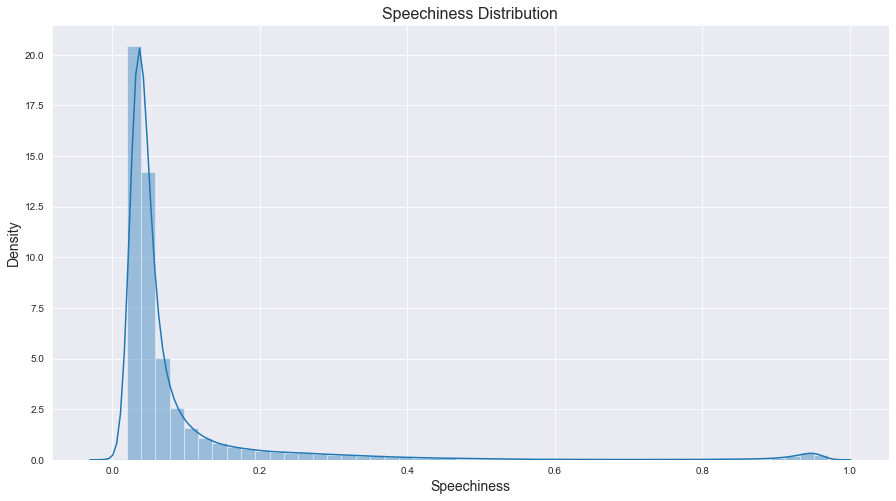

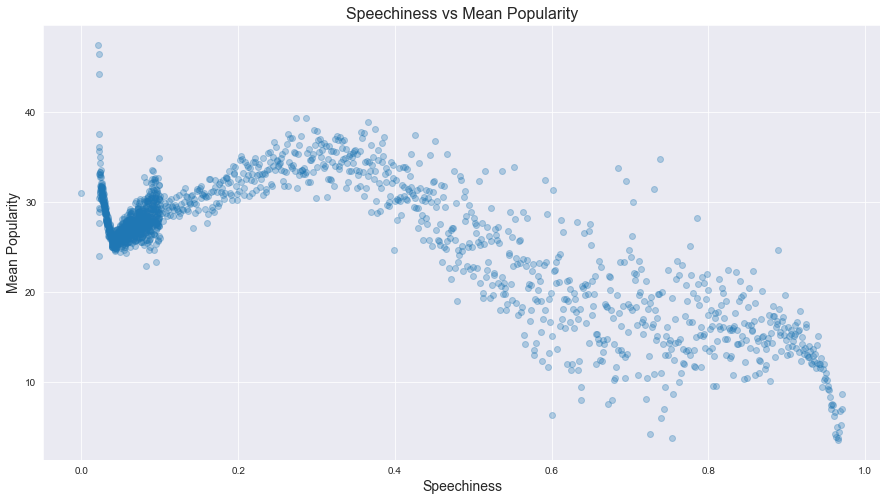

In [63]:
feature_analysis('speechiness')

The speechiness is highly concentrated between 0 and 0.1 and ranges in between 30 and 50. Outside those speechiness ranges, the popularity begins to vary greatly after 0.4

#### Instrumentalness

Instrumentalness correlation with popularity is -0.23167142416772774
count    567688.000000
mean          0.114381
std           0.267566
min           0.000000
25%           0.000000
50%           0.000029
75%           0.010400
max           1.000000
Name: instrumentalness, dtype: float64


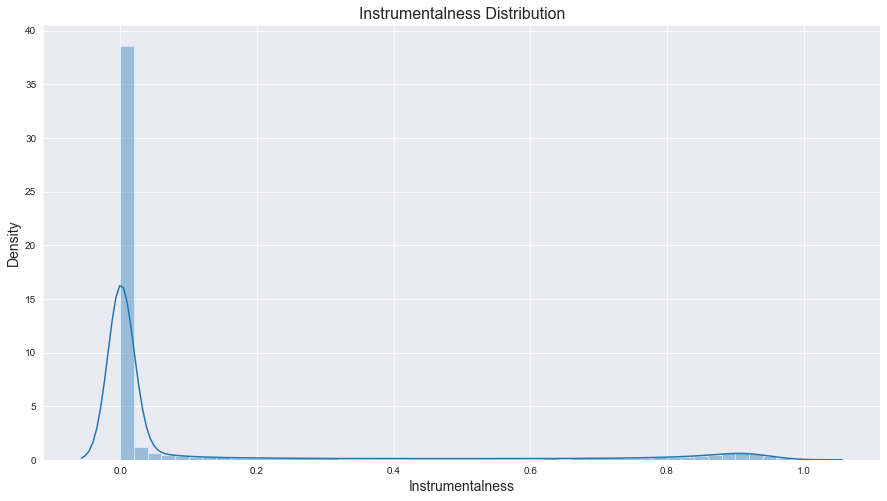

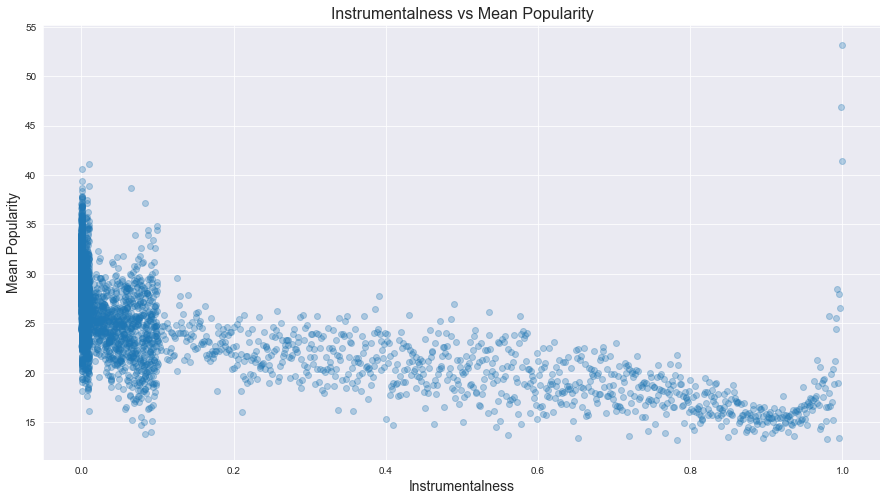

In [64]:
feature_analysis('instrumentalness')

The instrumentalness has higher popularity for songs with lower instrumentalness.

#### Liveness

Liveness correlation with popularity is -0.05762792296223831
count    567688.000000
mean          0.209461
std           0.181271
min           0.000000
25%           0.097500
50%           0.136000
75%           0.269000
max           1.000000
Name: liveness, dtype: float64


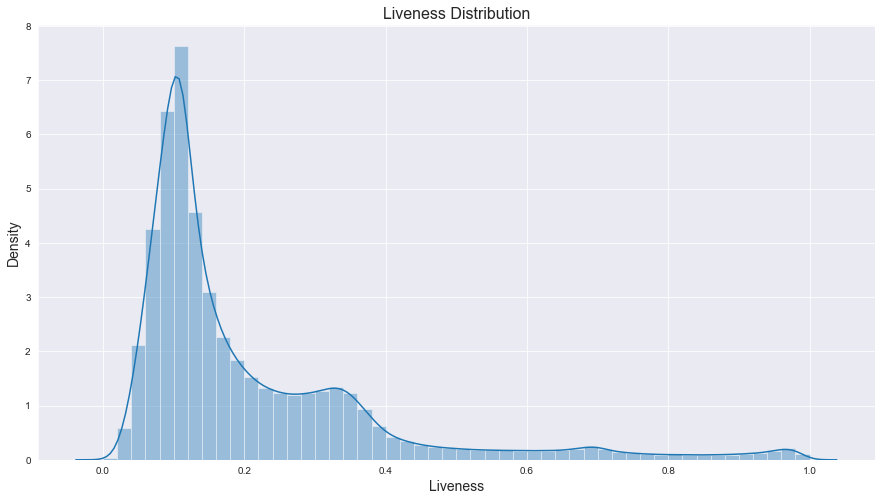

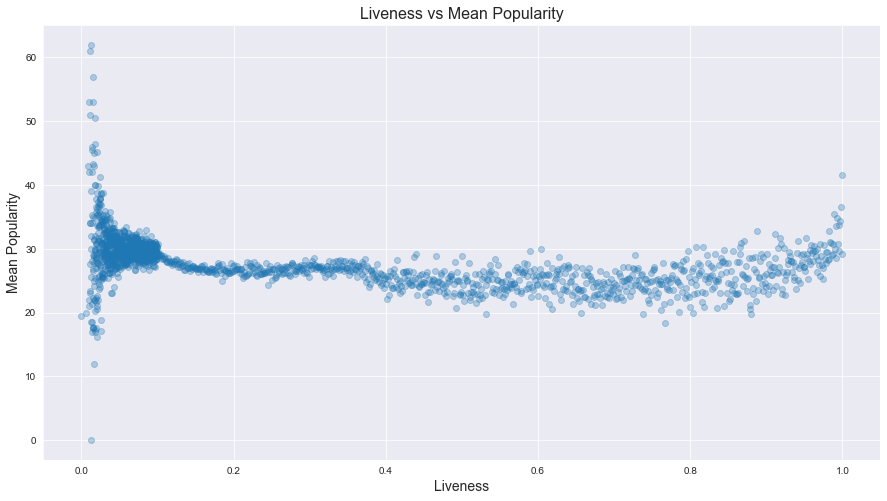

In [65]:
feature_analysis('liveness')

The liveness is mostly concentrated on the lower end but the average popularity stays consistent throughout the entire range.

#### Valence

Valence correlation with popularity is 0.006497321739474274
count    567688.000000
mean          0.551666
std           0.259426
min           0.000000
25%           0.343000
50%           0.562000
75%           0.772000
max           1.000000
Name: valence, dtype: float64


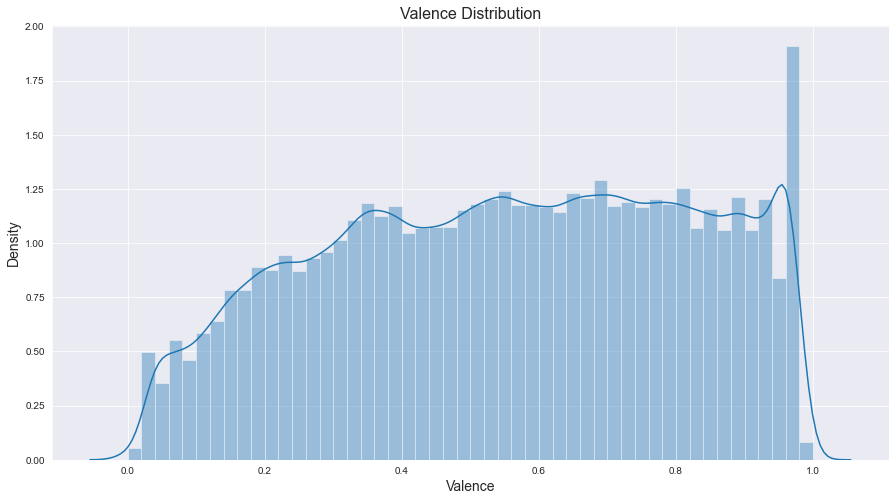

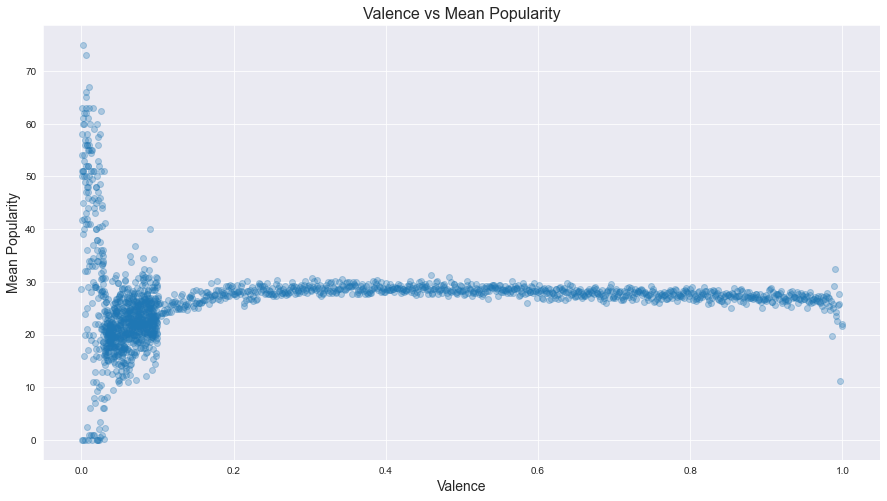

In [66]:
feature_analysis('valence')

Just like the others, valence has a wide range of popularity at the lower end but stays level, around 30-45, throughout the valence range outside of 0.2

#### Tempo

Tempo correlation with popularity is 0.07396348680750596
count    567688.000000
mean        118.899274
std          29.626173
min           0.000000
25%          96.011000
50%         117.975000
75%         136.790000
max         246.381000
Name: tempo, dtype: float64


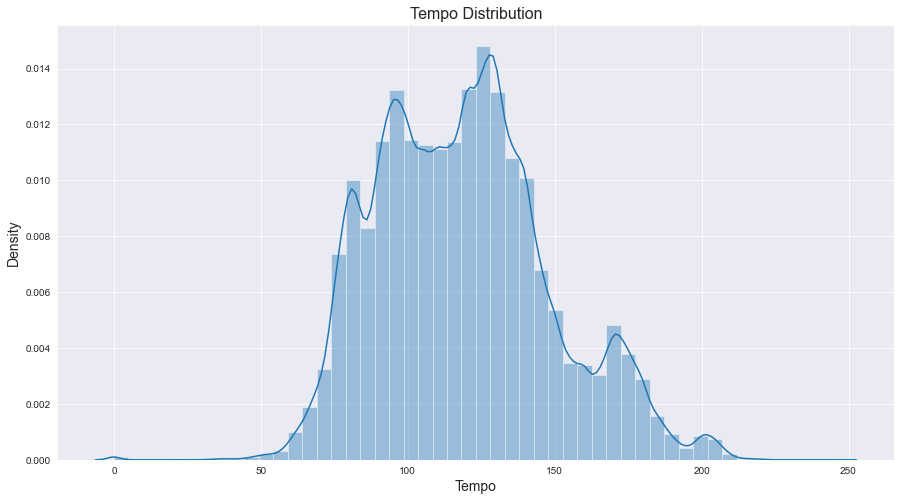

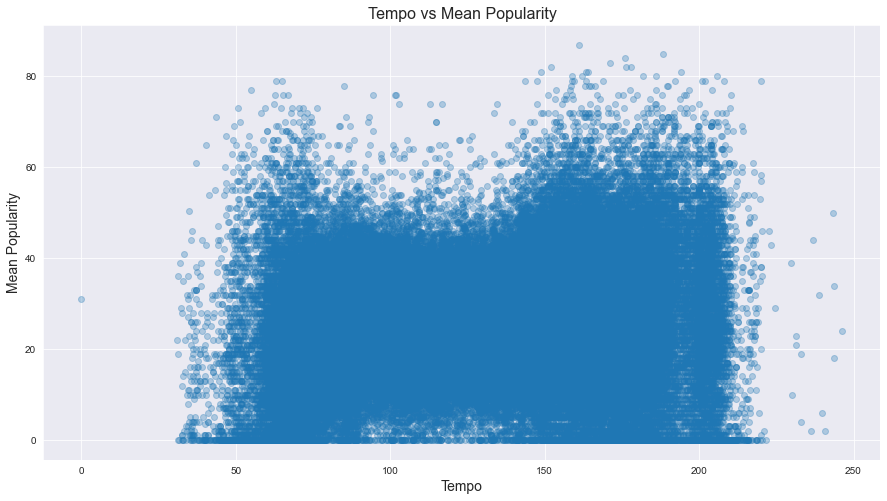

In [67]:
feature_analysis('tempo')

The tempo from 50-200 has a wide range of popularities unlike the other features.

#### Duration in MS

Duration_Ms correlation with popularity is 0.030838640642260697
count    5.676880e+05
mean     2.332988e+05
std      1.261705e+05
min      3.344000e+03
25%      1.780000e+05
50%      2.168690e+05
75%      2.653070e+05
max      5.621218e+06
Name: duration_ms, dtype: float64


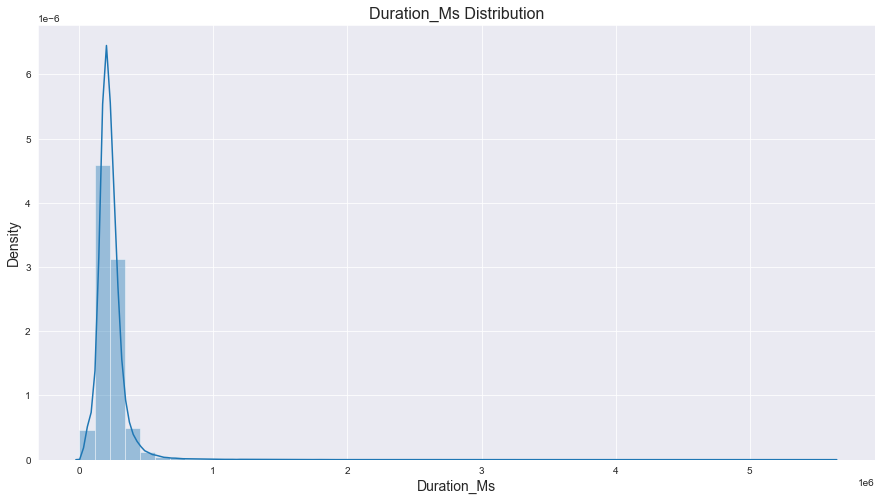

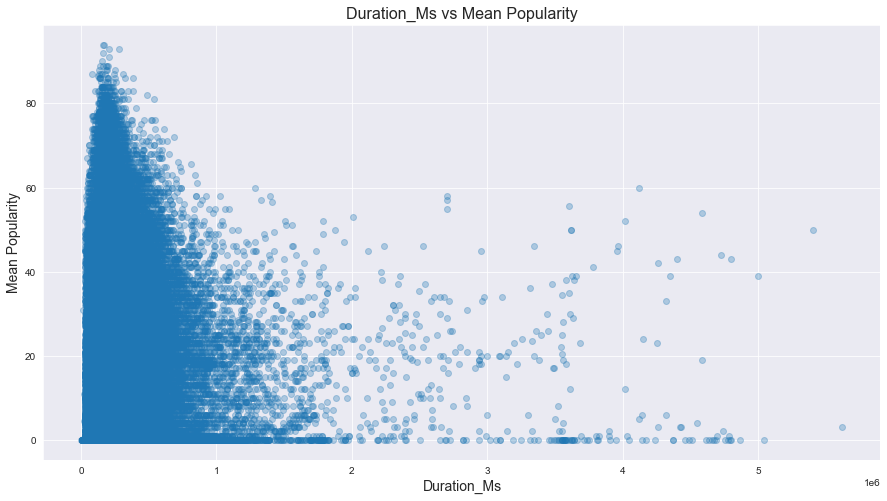

In [68]:
feature_analysis('duration_ms')

The bulk of the data is concentrated between 0 and 1 and the popularity range is spread out throughout the entire range of popularity.

## Data Preparation

The initial variables dropped earlier were song title, song id, and artists id as those are not helpful for predictions. We will use tracks from 2000 until present to see current trends in what makes up popular songs and remove outliers on the top end. We will also drop the artists, the mean popularity, the count, and the release date because for this project, we want to predict the popularity of songs based off of the actual song attributes and not base it off of already popular artists.

In [69]:
# Taking only tracks released from 2000 onward 
# as we want to predict popularity of more recent tracks
tracks = tracks[tracks['release_date'] >= 2000]

# Removing top end outliers to predict popularity
tracks = tracks[(tracks['popularity'] < 83)]

#### Splitting Target and Predictors

In [70]:
# Separating the target from the predictors
X = tracks.drop(['popularity', 'pop_artists_100songs', 'artists', 'mean', 'count', 'release_date'], axis=1)
y = tracks['popularity']

#### Splitting Training Set and Validation Set

In [71]:
# Separating the training set from the validation set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

#### OneHotEncoding Categoricals

Below we will OneHotEncode catergorical variables so that the algorithms can run correctly.

In [72]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categories='auto', drop='first', sparse=False)

In [73]:
# Transforming X_train for keys
key_ohe = ohe.fit_transform(X_train[['key']])
keys_df = pd.DataFrame(key_ohe, index=X_train.index, columns=['key_'+str(i) for i in list(set(X_train['key'].values))[1:]])
X_train = pd.concat([X_train, keys_df], axis=1).drop('key', axis=1)

# Transforming X_test for keys
test_key_ohe = ohe.transform(X_test[['key']])
test_keys_df = pd.DataFrame(test_key_ohe, index=X_test.index, columns=['key_'+str(i) for i in list(set(X_test['key'].values))[1:]])
X_test = pd.concat([X_test, test_keys_df], axis=1).drop('key', axis=1)

In [74]:
# Transforming X_train for time_signature
timesig_ohe = ohe.fit_transform(X_train[['time_signature']])
timesig_df = pd.DataFrame(timesig_ohe, index=X_train.index, columns=['timesig_'+str(i) for i in list(set(X_train['time_signature'].values))[1:]])
X_train = pd.concat([X_train, timesig_df], axis=1).drop('time_signature', axis=1)

# Transforming X_test for time_signature
test_timesig_ohe = ohe.transform(X_test[['time_signature']])
test_timesig_df = pd.DataFrame(test_timesig_ohe, index=X_test.index, columns=['timesig_'+str(i) for i in list(set(X_test['time_signature'].values))[1:]])
X_test = pd.concat([X_test, test_timesig_df], axis=1).drop('time_signature', axis=1)

#### Standard Scaling the Dataset

Below we will standard scale the data to normalize the features for equal measurement of distances for error.

In [75]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

## Modeling

In our modeling, we will be using Linear Regression as our starting model and build from there. We will be focusing our metric on mean squared error and converting it to root mean squared error while also looking at the r2 scores.

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_validate, StratifiedKFold, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [77]:
# Initiating dictionaries for mse and r2 scores
scores = {}
r2_scores = {}

In [78]:
# A function to add the scores from cross validation
def cv_scores(model, model_name):
    model_mse = model['test_neg_mean_squared_error'].mean()
    scores[model_name] = model_mse
    
    model_r2 = model['test_r2'].mean()
    r2_scores[model_name] = model_r2
    
    print(f'{model_name} Train MSE: {model_mse}')
    print(f'{model_name} Train R2: {model_r2}')

In [79]:
# Function to add scores from metrics mean_squared_error and r2_score
def train_scores(model, X, model_name):
    model_preds = model.predict(X)
    
    model_mse = -mean_squared_error(y_train, model_preds)
    scores[model_name] = model_mse
    
    model_r2 = r2_score(y_train, model_preds)
    r2_scores[model_name] = model_r2
    
    print(f'{model_name} Train MSE: {model_mse}')
    print(f'{model_name} Train R2: {model_r2}')

In [80]:
# Stratified K Fold parameters
stratified_kfold = StratifiedKFold(n_splits=5, 
                                   random_state=42, 
                                   shuffle=True)

#### First Simple Model with Acousticness

This model will be our baseline model of our target with one feature popularity is correlated with.

In [81]:
X_train_acoustic = X_train[['acousticness']]

In [82]:
lr_acoustic = LinearRegression()

In [83]:
lr_acoustic.fit(X_train_acoustic, y_train)

LinearRegression()

In [84]:
base_cv = cross_validate(lr_acoustic, 
                         X_train_acoustic, 
                         y_train, 
                         cv=stratified_kfold, 
                         scoring=['neg_mean_squared_error', 'r2'])

In [85]:
cv_scores(base_cv, model_name='Base')

Base Train MSE: -327.18288440622234
Base Train R2: 0.00022796676020180316


#### Model with Features with Correlation greater than .1

This model will add features and explore linear regression with columns of correlation greater than .1 with popularity.

In [86]:
corr_lr = LinearRegression()

In [87]:
cols = [col for col in X_train.columns if abs(X_train[col].corr(y_train))<0.1]

In [88]:
cols

['duration_ms',
 'energy',
 'mode',
 'speechiness',
 'acousticness',
 'liveness',
 'valence',
 'tempo',
 'key_1',
 'key_2',
 'key_3',
 'key_4',
 'key_5',
 'key_6',
 'key_7',
 'key_8',
 'key_9',
 'key_10',
 'key_11',
 'timesig_1',
 'timesig_3',
 'timesig_4',
 'timesig_5']

In [89]:
corr_lr.fit(X_train.drop(cols, axis=1), y_train)

LinearRegression()

In [90]:
corr_cv = cross_validate(corr_lr, 
                         X_train.drop(cols, axis=1), 
                         y_train, 
                         cv=stratified_kfold, 
                         scoring=['neg_mean_squared_error', 'r2'])

In [91]:
cv_scores(corr_cv, model_name='Corr')

Corr Train MSE: -292.35871748765646
Corr Train R2: 0.10663958908864728


As expected, our score increased with more variables predicting our target.

#### Model with all Numeric Features

In this next model, we will add all the relevant numeric features to see if our scores improve.

In [92]:
lr_all = LinearRegression()

In [93]:
lr_all.fit(X_train, y_train)

LinearRegression()

In [94]:
lr_all_cv = cross_validate(lr_all, 
                           X_train, 
                           y_train, 
                           cv=stratified_kfold, 
                           scoring=['neg_mean_squared_error', 'r2'])

In [95]:
cv_scores(lr_all_cv, model_name='All')

All Train MSE: -283.34972013430706
All Train R2: 0.134168433454984


Our model improved and we will continue with all the numeric features in our model.

#### Ridge CV

In [96]:
from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(cv=stratified_kfold, 
                   scoring='neg_mean_squared_error')

In [97]:
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
        cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
        scoring='neg_mean_squared_error')

In [98]:
train_scores(ridge_cv, X_train, model_name='Ridge')

Ridge Train MSE: -283.1955926196079
Ridge Train R2: 0.13463991365907257


Our score did better by a small amount.

#### Lasso CV

In [99]:
from sklearn.linear_model import Lasso

In [100]:
lasso = Lasso()

In [101]:
params = {'alpha': (0.001, 0.01, 0.1, 1, 10, 100, 1000)}

In [102]:
lasso_cv = GridSearchCV(lasso,
                        params,
                        cv=stratified_kfold, 
                        n_jobs=-1)

In [103]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': (0.001, 0.01, 0.1, 1, 10, 100, 1000)})

In [104]:
lasso_cv.best_params_

{'alpha': 0.001}

In [105]:
train_scores(lasso_cv, X_train, model_name='Lasso')

Lasso Train MSE: -283.1962714917341
Lasso Train R2: 0.13463783923116102


This model performed slightly worse than Ridge regularization.

#### Decision Tree Regression

The next model we will be exploring is the Decision Tree Regressor model.

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
dtr = DecisionTreeRegressor(max_depth=10,
                            max_leaf_nodes=50,
                            random_state=42)

In [108]:
dtr_cv = cross_validate(dtr, 
                        X_train, 
                        y_train,
                        cv=stratified_kfold,
                        scoring=['neg_mean_squared_error', 'r2'])

dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_leaf_nodes=50, random_state=42)

In [109]:
cv_scores(dtr_cv, model_name='DTR')

DTR Train MSE: -270.8878493406062
DTR Train R2: 0.17224839903768213


#### Random Forest Regressor

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
rfr = RandomForestRegressor(n_estimators=100, 
                            random_state=42, 
                            max_samples=.3,
                            warm_start=True)

In [112]:
params = {'max_depth': range(5, 75, 25),
         'max_leaf_nodes': range(20, 420, 100)}

In [113]:
rfr_cv = GridSearchCV(rfr, 
                      scoring='neg_mean_squared_error',
                      n_jobs=-1,
                      param_grid=params,
                      return_train_score=True,
                      cv=stratified_kfold)

In [114]:
#rfr_cv = rfr_cv.fit(X_train, y_train)

In [115]:
filename = './pickle/rfr_cv'
#outfile= open(filename, 'wb')

#pickle.dump(rfr_cv,outfile)
#outfile.close()

In [116]:
infile = open(filename, 'rb')
rfr_cv = pickle.load(infile)
infile.close()

In [117]:
rfr_cv.best_params_

{'max_depth': 30, 'max_leaf_nodes': 320}

In [118]:
rfr_model = RandomForestRegressor(max_depth=30, 
                            max_samples=0.3,
                            n_estimators=100, 
                            random_state=42,
                            max_leaf_nodes=320)

In [119]:
#rfr = rfr_model.fit(X_train, y_train)

In [120]:
filename = './pickle/rfr'
#outfile= open(filename, 'wb')

#pickle.dump(rfr,outfile)
#outfile.close()

In [121]:
infile = open(filename, 'rb')
rfr = pickle.load(infile)
infile.close()

In [122]:
train_scores(rfr, X_train, model_name='RFR')

RFR Train MSE: -246.5122328914631
RFR Train R2: 0.24673316711680582


In [123]:
feat_impt = pd.DataFrame(rfr.feature_importances_, index=X_train.columns)
feat_impt

0
duration_ms       0.109274
explicit          0.070733
danceability      0.051403
energy            0.064523
loudness          0.091959
mode              0.001548
speechiness       0.042323
acousticness      0.101962
instrumentalness  0.302487
liveness          0.042424
valence           0.058282
tempo             0.053039
key_1             0.000825
key_2             0.000998
key_3             0.000531
key_4             0.000784
key_5             0.000562
key_6             0.000705
key_7             0.000930
key_8             0.000894
key_9             0.000899
key_10            0.000451
key_11            0.000631
timesig_1         0.000281
timesig_3         0.000642
timesig_4         0.000593
timesig_5         0.000316

In [124]:
sorted_importances = feat_impt.sort_values(by=0, ascending=True)

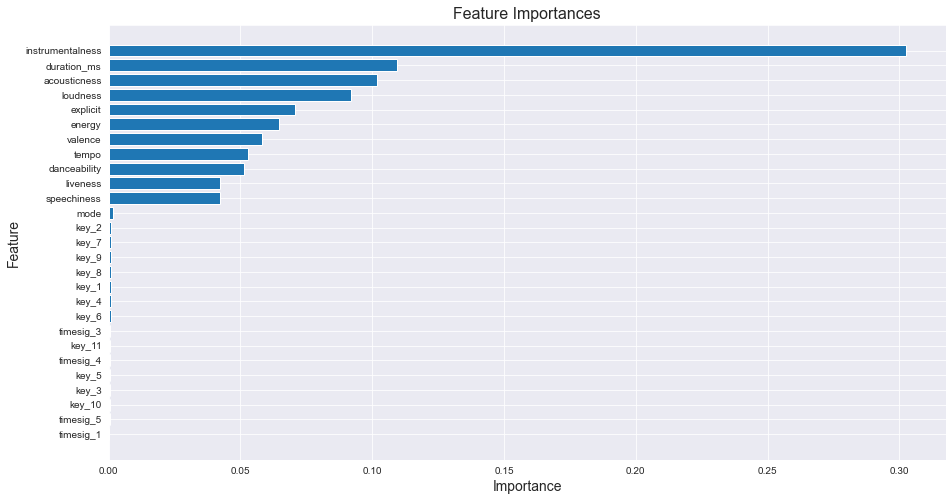

In [125]:
fig, ax = plt.subplots(figsize=(15,8))
ax.barh(sorted_importances.index, sorted_importances[0])
ax.set_title('Feature Importances', fontsize=16)
ax.set_ylabel('Feature', fontsize=14)
ax.set_xlabel('Importance', fontsize=14)
plt.savefig('./images/ft_impt_with_artists', bbox_inches='tight');

Above we can see the most important features are instrumentalness, duration,, and acousticness.

#### XGBoost

Our next model will go through XGBoost models.

In [126]:
import xgboost as xgb

In [127]:
xg_reg_model = xgb.XGBRegressor(objective='reg:squarederror', 
                          colsample_bytree=.5, 
                          learning_rate=.5, 
                          max_depth=10, 
                          n_estimators=25,
                          n_jobs=-1,
                          eval_metric='rmse')

In [128]:
xg_reg = xg_reg_model.fit(X_train, y_train)

In [129]:
train_scores(xg_reg, X_train, model_name='XGB')

XGB Train MSE: -173.44499785025067
XGB Train R2: 0.47000454023060667


#### Grid Search with XGBoost

In [130]:
xg_gs_model = xgb.XGBRegressor(objective='reg:squarederror',
                               colsample_bytree=.3,
                               n_jobs=-1,
                               eval_metric='rmse')

In [136]:
parameters = {
    'max_depth': range(4, 18, 3),
    'learning_rate': [0.3, 0.4, 0.5],
    'n_estimators': range(40, 120, 30)
}

In [137]:
xgb_gs = GridSearchCV(estimator=xg_gs_model,
                     param_grid=parameters,
                     scoring='neg_mean_squared_error',
                     cv=stratified_kfold,
                     return_train_score=True)

In [138]:
best_xgb = xgb_gs.fit(X_train, y_train)

In [139]:
filename = './pickle/best_xgb'
outfile= open(filename, 'wb')

pickle.dump(best_xgb,outfile)
outfile.close()

In [140]:
infile = open(filename, 'rb')
best_xgb = pickle.load(infile)
infile.close()

In [141]:
best_params = best_xgb.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 100}


In [142]:
best_xgb_preds = best_xgb.predict(X_train)

In [143]:
train_scores(best_xgb, X_train, model_name='Best XGB')

Best XGB Train MSE: -209.75136105582524
Best XGB Train R2: 0.3590632741336365


#### Deep Neural Network 

In [144]:
import tensorflow as tf
from keras import models
from keras import layers
from keras import regularizers
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_predict
tf.keras.backend.set_floatx('float64')

In [145]:
dnn = tf.keras.Sequential([
                             tf.keras.layers.Dense(128,activation="relu"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(64,activation="relu"),
                             tf.keras.layers.Dropout(.2),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [146]:
rmse_score = tf.keras.metrics.RootMeanSquaredError()

In [147]:
dnn.compile(loss="mean_squared_error", optimizer="adam", metrics=[rmse_score])

In [148]:
history = dnn.fit(x=X_train,y=y_train,epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
4603/4603 [==============================] - 4s 941us/step - loss: 305.1307 - root_mean_squared_error: 17.4680 - val_loss: 273.7582 - val_root_mean_squared_error: 16.5456
Epoch 2/20
4603/4603 [==============================] - 4s 960us/step - loss: 282.9169 - root_mean_squared_error: 16.8201 - val_loss: 268.3436 - val_root_mean_squared_error: 16.3812
Epoch 3/20
4603/4603 [==============================] - 4s 887us/step - loss: 277.8755 - root_mean_squared_error: 16.6696 - val_loss: 263.6644 - val_root_mean_squared_error: 16.2377
Epoch 4/20
4603/4603 [==============================] - 4s 857us/step - loss: 273.2399 - root_mean_squared_error: 16.5300 - val_loss: 264.1540 - val_root_mean_squared_error: 16.2528
Epoch 5/20
4603/4603 [==============================] - 4s 921us/step - loss: 270.7230 - root_mean_squared_error: 16.4537 - val_loss: 258.4333 - val_root_mean_squared_error: 16.0759
Epoch 6/20
4603/4603 [==============================] - 4s 898us/step - loss: 267.7049 - r

In [149]:
dnn_mse = min(history.history['loss'])
scores['DNN'] = -dnn_mse
dnn_r2 = r2_score(y_train, dnn.predict(X_train))
r2_scores['DNN'] = dnn_r2
print(f'DNN Train MSE: {dnn_mse}')
print(f'DNN Train R2: {dnn_r2}')

DNN Train MSE: 254.6409609552417
DNN Train R2: 0.2389322605527987


#### Converting MSE to RMSE

In [150]:
# converting the MSE scores to RMSE
def f(x):
    return np.sqrt(-x)

rmse = {k: f(v) for k, v in scores.items()}

rmse

{'Base': 18.0881973785732,
 'Corr': 17.09850044558459,
 'All': 16.832994984087268,
 'Ridge': 16.82841622433935,
 'Lasso': 16.82843639473775,
 'DTR': 16.458670946969143,
 'RFR': 15.700708037902722,
 'XGB': 13.169851853770059,
 'Best XGB': 14.482795346749372,
 'DNN': 15.95747351416388}

In [151]:
# Converting train RMSE dictionary to dataframe
rmse_df = pd.DataFrame(list(rmse.items()), columns=['Model', 'Train_Score'])
rmse_df

Model  Train_Score
0      Base    18.088197
1      Corr    17.098500
2       All    16.832995
3     Ridge    16.828416
4     Lasso    16.828436
5       DTR    16.458671
6       RFR    15.700708
7       XGB    13.169852
8  Best XGB    14.482795
9       DNN    15.957474

In [152]:
# Converting train R2 dictionary to dataframe
r2_df = pd.DataFrame(list(r2_scores.items()), columns=['Model', 'Train_Score'])
r2_df

Model  Train_Score
0      Base     0.000228
1      Corr     0.106640
2       All     0.134168
3     Ridge     0.134640
4     Lasso     0.134638
5       DTR     0.172248
6       RFR     0.246733
7       XGB     0.470005
8  Best XGB     0.359063
9       DNN     0.238932

As we iterated through the base model with linear regression, to the random forest models, to xgb regression, and finally neural network model, we observed the mean squared error score decrease from 17 to 13 and the r2 scores increasse from 0.07 to 0.47. The base linear regression model scores performed better as we added more features but did not perform better when adding in regularization factors. Moving on to decision trees and random forest regression, our model performed better on the decision tree model, due to overfitting. The optimized parameters for the random forest regression model scored lower than the decision tree model. The xgboost models performed similarly to the decision tree models. 

The XGB model performs the best on the training data based on the mse and r2 scores. In the next section, we will evaluate how the models perform on the testing data.

## Evaluation

Below we will calculate our test scores for RMSE and R2.

In [153]:
test_rmse = {}
test_r2 = {}

In [154]:
def val_scores(model, X_test, name):
    preds = model.predict(X_test)
    model_rmse = np.sqrt(mean_squared_error(y_test, preds))
    model_r2 = r2_score(y_test, preds)
    test_rmse[name] = np.sqrt(mean_squared_error(y_test, preds))
    test_r2[name] = r2_score(y_test, preds)
    print(f'{name} Test RMSE: {model_rmse}')
    print(f'{name} Test R2: {model_r2}')

In [155]:
# Base model
val_scores(lr_acoustic, X_test[['acousticness']], name='Base')

Base Test RMSE: 18.06595198626655
Base Test R2: -3.4367631107201646e-05


In [156]:
# Correlation > 0.25
val_scores(corr_lr, X_test.drop(cols, axis=1), name='Corr')

Corr Test RMSE: 17.049101620747237
Corr Test R2: 0.10937225380780335


In [157]:
# All
val_scores(lr_all, X_test, name='All')

All Test RMSE: 16.790912652882824
All Test R2: 0.13614305944624228


In [158]:
# Ridge CV
val_scores(ridge_cv, X_test, name='Ridge')

Ridge Test RMSE: 16.79090915688247
Ridge Test R2: 0.1361434191698523


In [159]:
# Lasso CV
val_scores(lasso_cv, X_test, name='Lasso')

Lasso Test RMSE: 16.79083371059472
Lasso Test R2: 0.13615118225464296


In [160]:
# Decision Tree Regression
val_scores(dtr, X_test, name='DTR')

DTR Test RMSE: 16.352890366362836
DTR Test R2: 0.18062582388162562


In [161]:
# Random Forest Regression
val_scores(rfr, X_test, name='RFR')

RFR Test RMSE: 15.642001315821602
RFR Test R2: 0.250316662620063


In [162]:
# XGBoost
val_scores(xg_reg, X_test, name='XGB')

XGB Test RMSE: 15.996358947663625
XGB Test R2: 0.2159649036605773


In [163]:
# XGBoost Grid Search CV
val_scores(best_xgb, X_test, name='Best XGB')

Best XGB Test RMSE: 15.728970520667628
Best XGB Test R2: 0.24195703957985193


In [164]:
# DNN 
val_scores(dnn, X_test, name='DNN')

DNN Test RMSE: 15.849990502259798
DNN Test R2: 0.2302472755938928


In [165]:
# Converting RMSE test dictionary to dataframe
test_rmse_df = pd.DataFrame(list(test_rmse.items()), columns=['Model_Test', 'Test_Score'])
test_rmse_df

Model_Test  Test_Score
0       Base   18.065952
1       Corr   17.049102
2        All   16.790913
3      Ridge   16.790909
4      Lasso   16.790834
5        DTR   16.352890
6        RFR   15.642001
7        XGB   15.996359
8   Best XGB   15.728971
9        DNN   15.849991

In [166]:
# Combining RMSE train and test scores into one dataframe
rmse_df = pd.concat([rmse_df, test_rmse_df], axis=1, join='inner')
rmse_df = rmse_df.drop('Model_Test', axis=1)
rmse_df

Model  Train_Score  Test_Score
0      Base    18.088197   18.065952
1      Corr    17.098500   17.049102
2       All    16.832995   16.790913
3     Ridge    16.828416   16.790909
4     Lasso    16.828436   16.790834
5       DTR    16.458671   16.352890
6       RFR    15.700708   15.642001
7       XGB    13.169852   15.996359
8  Best XGB    14.482795   15.728971
9       DNN    15.957474   15.849991

In [167]:
# Converting R2 test dictionary to dataframe
test_r2_df = pd.DataFrame(list(test_r2.items()), columns=['Model_Test', 'Test_Score'])
test_r2_df

Model_Test  Test_Score
0       Base   -0.000034
1       Corr    0.109372
2        All    0.136143
3      Ridge    0.136143
4      Lasso    0.136151
5        DTR    0.180626
6        RFR    0.250317
7        XGB    0.215965
8   Best XGB    0.241957
9        DNN    0.230247

In [168]:
# Combining R2 train and test scores into one dataframe
r2_df = pd.concat([r2_df, test_r2_df], axis=1, join='inner')
r2_df = r2_df.drop('Model_Test', axis=1)
r2_df

Model  Train_Score  Test_Score
0      Base     0.000228   -0.000034
1      Corr     0.106640    0.109372
2       All     0.134168    0.136143
3     Ridge     0.134640    0.136143
4     Lasso     0.134638    0.136151
5       DTR     0.172248    0.180626
6       RFR     0.246733    0.250317
7       XGB     0.470005    0.215965
8  Best XGB     0.359063    0.241957
9       DNN     0.238932    0.230247

#### Plotting Train and Test Scores

Below we will plot the training and test scores for RMSE and R2 to evaluate how the models did on the test set in comparison to the training set.

#### RMSE Scores

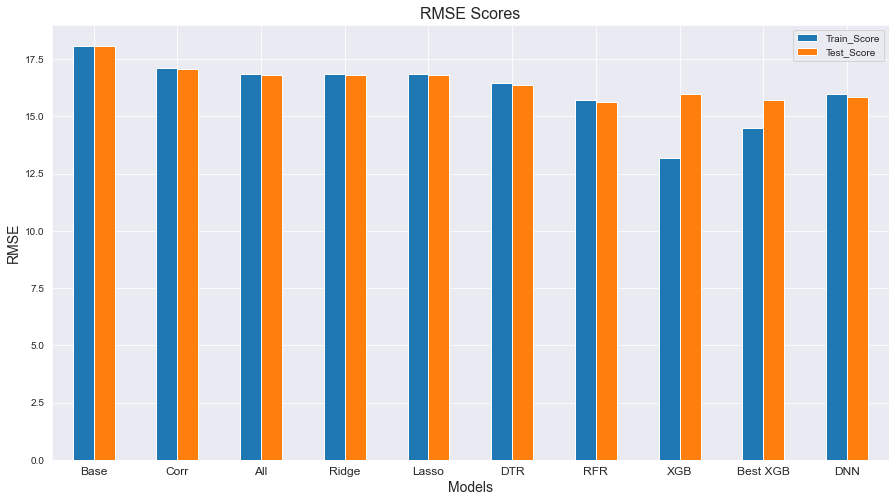

In [169]:
fig, ax = plt.subplots(figsize=(15,8))
rmse_df.plot(ax=ax, kind='bar')
ax.set_title('RMSE Scores', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('RMSE', fontsize=14)
ax.set_xticklabels(rmse_df['Model'], fontsize=12, rotation=0)
plt.savefig('./images/rmse_scores', bbox_inches='tight');

#### R2 Scores

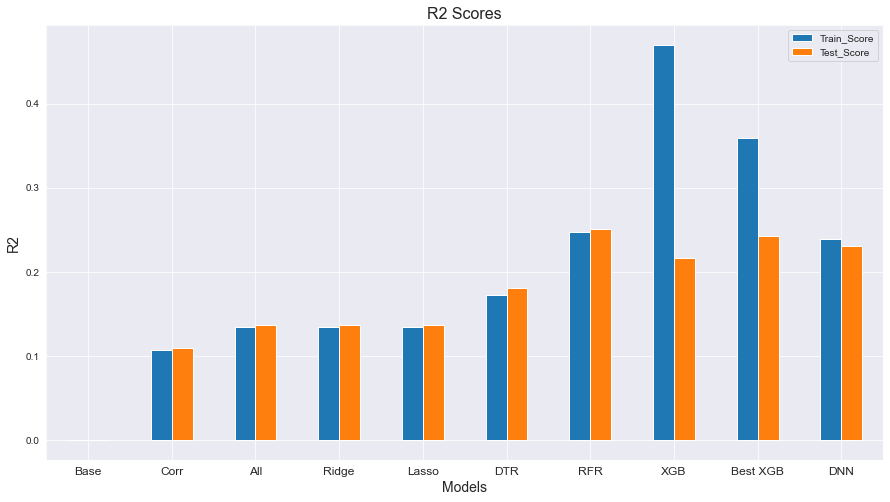

In [170]:
fig, ax = plt.subplots(figsize=(15,8))
r2_df.plot(ax=ax, kind='bar')
ax.set_title('R2 Scores', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('R2', fontsize=14)
ax.set_xticklabels(r2_df['Model'], fontsize=12, rotation=0)
plt.savefig('./images/r2_scores', bbox_inches='tight');

Our evaluation metric in this project was mainly the RMSE score while also observing the r2 score. The RMSE score is a measure of the square root the mean squared error, which measures the average of the distances between the actual popularity and the predicted popularity. The goal for this project is to minimize that distance. The r2 score tells us what % of the variance is explained by the model and we try to get this value as high as possible. The RMSE scores for our linear regression models were almost the same, indicating that the training and test predictions performed roughly the same. The decision tree model also performed roughly the same on the training and validation set. The random forest regression model and the XGBoost models performed poorly on the validation set, indicating those models were overfit. Although the models were overfit, they still performed better than our baseline model. With these results, we are somewhat confident in our best model, the XGBoost model, and its ability generalize and predict popularity.

## Conclusions

As a result of this project, I believe we can recommend music production studios to make new songs with popular artists and to make the songs lean on the side of mixing in vocals with instruments. Some reasons why this analysis might not fully solve the problem is due to the size of the data and the parameter tuning of the model. Subsetting the data by years and dividing it out into different genre models will most likely lead to better predictions, which is also a next step for improvement on the project. 